In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import statsmodels.api as sm

# Gender Distribution

In [2]:
# Define the folder path
folder_path = '/Users/twylazhang/Desktop/Directed Research/gender distribution/Full-Time, Year-Round Workers & Median Earnings by Sex & Occupation'

# Define column names for files with and without MOE3 columns
estimate_only_columns = [
    'Occupational Category',
    'Total_FullTime_Workers_Estimate',
    'Men_FullTime_Workers',
    'Women_FullTime_Workers',
    'Women_Percentage_in_Group_Estimate',
    'Total_Median_Earnings_Estimate',
    'Men_Median_Earnings_Estimate',
    'Women_Median_Earnings_Estimate',
    'Women_Earnings_as_Percentage_of_Men_Estimate',
]

full_columns = [
    'Occupational Category',
    'Total_FullTime_Workers_Estimate',
    'Total_FullTime_Workers_MOE3',
    'Men_FullTime_Workers',
    'Men_FullTime_Workers_MOE3',
    'Women_FullTime_Workers',
    'Women_FullTime_Workers_MOE3',
    'Women_Percentage_in_Group_Estimate',
    'Women_Percentage_in_Group_MOE3',
    'Total_Median_Earnings_Estimate',
    'Total_Median_Earnings_MOE3',
    'Men_Median_Earnings_Estimate',
    'Men_Median_Earnings_MOE3',
    'Women_Median_Earnings_Estimate',
    'Women_Median_Earnings_MOE3',
    'Women_Earnings_as_Percentage_of_Men_Estimate',
    'Women_Earnings_as_Percentage_of_Men_MOE3'
]

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through all files in the folder
for file in os.listdir(folder_path):
    if file.endswith('.xlsx') and not file.startswith('~$'):
        file_path = os.path.join(folder_path, file)
        
        try:
            # Extract the year from the filename
            year = ''.join(filter(str.isdigit, file))
            
            # Load each Excel file into a DataFrame, skipping the first seven rows
            df = pd.read_excel(file_path, skiprows=7, engine='openpyxl')
            
            # Check the number of columns and assign appropriate column names
            if len(df.columns) == len(estimate_only_columns):
                df.columns = estimate_only_columns
            else:
                df.columns = full_columns
            
            # Add the year column to the DataFrame
            df['Year'] = year
            
            # Append the DataFrame to the list
            dataframes.append(df)
        except Exception as e:
            print(f"Error loading {file}: {e}")

# Combine all DataFrames into a single DataFrame and remove the last 5 rows
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    
    # Remove the last 12 rows
    combined_df = combined_df.iloc[:-12]
    
    print("Combined DataFrame with Renamed Columns, Year, and Last 5 Rows Removed:")
    print(combined_df)
else:
    print("No valid files were loaded.")

Combined DataFrame with Renamed Columns, Year, and Last 5 Rows Removed:
                                  Occupational Category  \
0                                                 Total   
1     Management, Business, Science, and Arts Occupa...   
2      Management, Business, and Financial Occupations:   
3                               Management Occupations:   
4                                      Chief executives   
...                                                 ...   
5694  Transportation attendants, except flight atten...   
5695                       Other transportation workers   
5696                        Material Moving Occupations   
5697                     Conveyor operators and tenders   
5698                          Crane and tower operators   

      Total_FullTime_Workers_Estimate  Total_FullTime_Workers_MOE3  \
0                           113904639                     125724.0   
1                            49569176                     169245.0   
2        

In [3]:
combined_df

,Occupational Category,Total_FullTime_Workers_Estimate,Total_FullTime_Workers_MOE3,Men_FullTime_Workers,Men_FullTime_Workers_MOE3,Women_FullTime_Workers,Women_FullTime_Workers_MOE3,Women_Percentage_in_Group_Estimate,Women_Percentage_in_Group_MOE3,Total_Median_Earnings_Estimate,Total_Median_Earnings_MOE3,Men_Median_Earnings_Estimate,Men_Median_Earnings_MOE3,Women_Median_Earnings_Estimate,Women_Median_Earnings_MOE3,Women_Earnings_as_Percentage_of_Men_Estimate,Women_Earnings_as_Percentage_of_Men_MOE3,Year
0,Total,113904639,125724.0,64356313,83087.0,49548326,95377.0,43.5,0.1,50078,54,53544,209,43394,181,81,0.4,2019
1,"Management, Business, Science, and Arts Occupa...",49569176,169245.0,24972005,101347.0,24597171,89023.0,49.6,0.1,69998,196,81524,133,60523,100,74.2,0.1,2019
2,"Management, Business, and Financial Occupations:",21998717,92539.0,12218349,57032.0,9780368,52738.0,44.5,0.1,75389,177,85162,309,65379,211,76.8,0.3,2019
3,Management Occupations:,14867734,72493.0,8900617,48751.0,5967117,39262.0,40.1,0.2,78315,684,87792,963,66767,289,76.1,0.8,2019
4,Chief executives,1268017,20322.0,932743,16035.0,335274,10531.0,26.4,0.7,150513,442,157133,3570,120635,1413,76.8,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,"Transportation attendants, except flight atten...",16231,2038.0,7588,1638.0,8643,1461.0,53.2,6.0,27324,2845,30883,3131,24992,2644,(X),(X),2017
5695,Other transportation workers,21836,3218.0,19962,2942.0,1874,788.0,8.6,3.4,41018,2166,40568,2498,48071,11546,(X),(X),2017
5696,Material Moving Occupations,2734108,31164.0,2204058,27068.0,530050,12220.0,19.4,0.4,30841,132,31790,148,25935,263,81.6,0.9,2017
5697,Conveyor operators and tenders,4446,1176.0,3363,1103.0,1083,682.0,24.4,13.9,33777,4421,36328,5565,19295,1918,(X),(X),2017


Women_Percentage_Out_Of_All_Women: percentage of full-time women workers in each occupational category relative to the total number of full-time women workers across all categories

In [4]:
# Extract the base value from the 'total' row under the 'Women_FullTime_Workers' column
base_value = combined_df[combined_df['Occupational Category'] == 'Total']['Women_FullTime_Workers'].values[0]

# Create the new column by dividing each value in 'Women_FullTime_Workers' by the base value
combined_df['Women_Percentage_Out_Of_All_Women'] = (combined_df['Women_FullTime_Workers'] / base_value) * 100

# Display the first few rows to verify the new column
combined_df[['Women_FullTime_Workers', 'Women_Percentage_Out_Of_All_Women']]

,Women_FullTime_Workers,Women_Percentage_Out_Of_All_Women
0,49548326,100.000000
1,24597171,49.642789
2,9780368,19.739048
3,5967117,12.043024
4,335274,0.676661
...,...,...
5694,8643,0.017444
5695,1874,0.003782
5696,530050,1.069764
5697,1083,0.002186


clean the occupation names

In [5]:
# Retain only alphabetic characters in the 'Occupational Category' column
combined_df['Occupational Category'] = combined_df['Occupational Category'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Display the cleaned DataFrame
print("DataFrame after cleaning 'Occupational Category' column:")
print(combined_df.head())

DataFrame after cleaning 'Occupational Category' column:
                              Occupational Category  \
0                                             Total   
1  Management Business Science and Arts Occupations   
2     Management Business and Financial Occupations   
3                            Management Occupations   
4                                  Chief executives   

   Total_FullTime_Workers_Estimate  Total_FullTime_Workers_MOE3  \
0                        113904639                     125724.0   
1                         49569176                     169245.0   
2                         21998717                      92539.0   
3                         14867734                      72493.0   
4                          1268017                      20322.0   

   Men_FullTime_Workers  Men_FullTime_Workers_MOE3  Women_FullTime_Workers  \
0              64356313                    83087.0                49548326   
1              24972005                   101347.0   

unique occupations

In [6]:
combined_df.to_csv("/Users/twylazhang/Desktop/Directed Research/gender distribution/combined.csv")

In [7]:
combined_df[combined_df["Year"] == 2022]

,Occupational Category,Total_FullTime_Workers_Estimate,Total_FullTime_Workers_MOE3,Men_FullTime_Workers,Men_FullTime_Workers_MOE3,Women_FullTime_Workers,Women_FullTime_Workers_MOE3,Women_Percentage_in_Group_Estimate,Women_Percentage_in_Group_MOE3,Total_Median_Earnings_Estimate,Total_Median_Earnings_MOE3,Men_Median_Earnings_Estimate,Men_Median_Earnings_MOE3,Women_Median_Earnings_Estimate,Women_Median_Earnings_MOE3,Women_Earnings_as_Percentage_of_Men_Estimate,Women_Earnings_as_Percentage_of_Men_MOE3,Year,Women_Percentage_Out_Of_All_Women


In [8]:
#combined_df.to_excel("/Users/twylazhang/Desktop/Directed Research/gender distribution/combined.xlsx", index=False)

### Match the crosswalk with combined_df based on occupation to assign the 2018 SOC Code to combined_df

In [9]:
corsswalk_SOC_combined_2022_mapping = {
    'Public relations and fundraising managers': ['Public Relations Managers', 'Fundraising Managers'],
    'Claims adjusters appraisers examiners and investigators': ['Claims Adjusters, Examiners, and Investigators'],
    'Credit counselors and loan officers': ['Loan Officers', 'Credit Counselors'],
    'Computer support specialists': ['Computer Network Support Specialists', 'Computer User Support Specialists'],
    'Surveyors cartographers and photogrammetrists': ['Cartographers and Photogrammetrists'],
    'Electrical and electronics engineers': ['Electrical Engineers', 'Electronics Engineers, Except Computer'],
    'Chemists and materials scientists': ['Materials Scientists', 'Chemists'],
    'Agricultural and food science technicians': ['Agricultural Technicians', 'Food Science Technicians'],
    'Environmental science and geoscience technicians': ['Environmental Science and Protection Technicians, Including Health', 'Geological Technicians, Except Hydrologic Technicians'],
    'Occupational health and safety specialists and technicians': ['Occupational Health and Safety Technicians'],
    'Broadcast sound and lighting technicians': ['Broadcast Technicians', 'Sound Engineering Technicians', 'Lighting Technicians'],
    'Television video and film camera operators and editors': ['Film and Video Editors'],
    'Clinical laboratory technologists and technicians': ['Medical and Clinical Laboratory Technicians'],
    'Miscellaneous health technologists and technicians': ['Health Technologists and Technicians, All Other'],
    'Occupational therapy assistants and aides': ['Occupational Therapy Assistants', 'Occupational Therapy Aides'],
    'Physical therapist assistants and aides': ['Physical Therapist Assistants', 'Physical Therapist Aides'],
    'Police officers': ["Police and Sheriff's Patrol Officers"],
    'Supervisors of personal care and service workers': ['First-Line Supervisors of Personal Service Workers'],
    'Gambling services workers': ['First-Line Supervisors of Gambling Services Workers'],
    'Tour and travel guides': ['Travel Guides', 'Tour Guides and Escorts'],
    'Models demonstrators and product promoters': ['Demonstrators and Product Promoters'],
    'Real estate brokers and sales agents': ['Real Estate Sales Agents'],
    'Carpet floor and tile installers and finishers': ['Floor Sanders and Finishers'],
    'Construction equipment operators': ['Operating Engineers and Other Construction Equipment Operators'],
    'Derrick rotary drill and service unit operators oil and gas': ['Derrick Operators, Oil and Gas', 'Rotary Drill Operators, Oil and Gas', 'Service Unit Operators, Oil and Gas'],
    'Underground mining machine operators': ['Loading and Moving Machine Operators, Underground Mining', 'Underground Mining Machine Operators, All Other'],
    'Radio and telecommunications equipment installers and repairers': ['Radio, Cellular, and Tower Equipment Installers and Repairers', 'Camera and Photographic Equipment Repairers'],
    'Small engine mechanics': ['Outdoor Power Equipment and Other Small Engine Mechanics'],
    'Control and valve installers and repairers': ['Control and Valve Installers and Repairers, Except Mechanical Door'],
    'Precision instrument and equipment repairers': ['Precision Instrument and Equipment Repairers, All Other'],
    'Electrical electronics and electromechanical assemblers': ['Electrical and Electronic Equipment Assemblers', 'Electromechanical Equipment Assemblers'],
    'Computer numerically controlled tool operators and programmers': ['Computer Numerically Controlled Tool Programmers'],
    'Model makers and patternmakers metal and plastic': ['Model Makers, Metal and Plastic', 'Patternmakers, Metal and Plastic'],
    'Textile machine setters operators and tenders': ['Textile Bleaching and Dyeing Machine Operators and Tenders', 'Textile Cutting Machine Setters, Operators, and Tenders', 'Textile Knitting and Weaving Machine Setters, Operators, and Tenders', 'Textile Winding, Twisting, and Drawing Out Machine Setters, Operators, and Tenders'],
    'Power plant operators distributors and dispatchers': ['Power Distributors and Dispatchers'],
    'Miscellaneous plant and system operators': ['Power Plant Operators', 'Chemical Plant and System Operators', 'Gas Plant Operators'],
    'Dental and ophthalmic laboratory technicians and medical appliance technicians': ['Dental Laboratory Technicians', 'Medical Appliance Technicians', 'Ophthalmic Laboratory Technicians'],
    'Aircraft pilots and flight engineers': ['Airline Pilots, Copilots, and Flight Engineers'],
    'Air traffic controllers and airfield operations specialists': ['Air Traffic Controllers', 'Airfield Operations Specialists'],
    'Driversales workers and truck drivers': ['Heavy and Tractor-Trailer Truck Drivers', 'Light Truck Drivers'],
    'Locomotive engineers and operators': ['Locomotive Engineers'],
    'Transportation service attendants': ['Automotive and Watercraft Service Attendants', 'Aircraft Service Attendants'],
    'Pumping station operators': ['Gas Compressor and Gas Pumping Station Operators']
}

In [10]:
# Define SOC_2018only_combined_2022_mapping
SOC_2018only_combined_2022_mapping = {
    'database administrators and architects': [
        'Database Administrators', 
        'Database Architects'
    ],
    'geoscientists and hydrologists except geographers': [
        'Geoscientists, Except Hydrologists and Geographers', 
        'Hydrologists'
    ],
    'nuclear medicine technologists and medical dosimetrists': [
        'Nuclear Medicine Technologists', 
        'Medical Dosimetrists'
    ],
    'dietetic technicians and ophthalmic medical technicians': [
        'Dietetic Technicians', 
        'Ophthalmic Medical Technicians'
    ],
    'orderlies and psychiatric aides': [
        'Orderlies', 
        'Psychiatric Aides'
    ],
    'janitors and building cleaners': [
        'Building Cleaning Workers', 
        'Janitors and Cleaners, Except Maids and Housekeeping Cleaners'
    ],
    'embalmers crematory operators and funeral attendants': [
        'Embalmers and Crematory Operators', 
        'Funeral Attendants'
    ],
    'other personal appearance workers': [
        'Miscellaneous Personal Appearance Workers'
    ],
    'electrical and electronics repairers industrial and utility': [
        'Electrical and Electronics Repairers, Commercial and Industrial Equipment', 
        'Electrical and Electronics Repairers, Powerhouse, Substation, and Relay'
    ],
    'industrial and refractory machinery mechanics': [
        'Industrial Machinery Mechanics'
    ],
    'other machine tool setters operators and tenders metal and plastic': [
        'Machine Tool Cutting Setters, Operators, and Tenders, Metal and Plastic'
    ],
    'other production equipment operators and tenders': [
        'Chemical Equipment Operators and Tenders', 
        'Cooling and Freezing Equipment Operators and Tenders'
    ],
    'conveyor dredge and hoist and winch operators': [
        'Hoist and Winch Operators'
    ]
}

	1.	For each row in combined_df_2022, if the Occupational Category matches a key in combined_mapping, we’ll check the values in 2018 SOC Title for any corresponding matches.
	2.	If a match is found within the list associated with the key, we consider the two as matched.

In [11]:
# Load the specified Excel file into a DataFrame
file_path_2023 = '/Users/twylazhang/Desktop/Directed Research/gender distribution/other gender data/2023 women employed out of all.xlsx'
women_employment_df_2023 = pd.read_excel(file_path_2023)

# Rename the columns
women_employment_df_2023.columns = [
    'Occupational Category', 
    'Total Employed', 
    'Percent of Employed Women', 
    'Percent of Employed White', 
    'Percent of Employed Black or African American', 
    'Percent of Employed Asian', 
    'Percent of Employed Hispanic or Latino'
]


# Display the first few rows of the DataFrame to verify the data
women_employment_df_2023

,Occupational Category,Total Employed,Percent of Employed Women,Percent of Employed White,Percent of Employed Black or African American,Percent of Employed Asian,Percent of Employed Hispanic or Latino
0,"Total, 16 years and over",161037.0,46.9,76.5,12.8,6.9,18.8
1,"Management, professional, and related occupations",70275.0,51.8,76.9,10.6,9.3,11.2
2,"Management, business, and financial operations...",30544.0,45.7,79.7,9.8,7.5,11.8
3,Management occupations,20906.0,41.9,80.9,9.2,7,12.1
4,Chief executives,1780.0,30.6,85.8,5.2,7.3,6.3
...,...,...,...,...,...,...,...
594,"Packers and packagers, hand",690.0,51.7,61.8,25.8,6.3,35.3
595,Stockers and order fillers,1640.0,36.5,74.7,15.5,4.8,23.6
596,Pumping station operators,21.0,–,–,–,–,–
597,Refuse and recyclable material collectors,112.0,12.8,79.2,17.1,0.3,33.7


In [12]:
import pandas as pd
import re

# Load combined_df and filter to include only rows where Year is 2022
combined_df_2022 = combined_df[combined_df['Year'] == "2022"].copy()

# Load crosswalk file as df_2019_to_SOC_Crosswalk with dtype specified to prevent conversions
soc2019_structure_path = '/Users/twylazhang/Desktop/Directed Research/gender distribution/SOC data/2019_to_SOC_Crosswalk.xlsx'
df_2019_to_SOC_Crosswalk = pd.read_excel(soc2019_structure_path, dtype=str)

# Define combined mappings
combined_mapping = {**SOC_2018only_combined_2022_mapping, **corsswalk_SOC_combined_2022_mapping}

# Enhanced standardization function to handle "other" phrases in any occupation title
def standardize_name(name):
    if pd.isna(name):
        return name
    name = str(name).lower()
    name = re.sub(r'[^a-z0-9\s]', '', name)  # Remove punctuation
    name = re.sub(r'\s+', ' ', name).strip()  # Collapse multiple spaces

    # Place "other" at the beginning if applicable
    if "all other" in name or "other" in name:
        name = re.sub(r'\ball other\b|\bother\b', 'other', name)  # Normalize to "other"
        words = name.split()
        if "other" in words:
            words.remove("other")
            name = "other " + " ".join(words)
    
    return name

# Apply standardization to both DataFrames
combined_df_2022['Standardized_Occupational_Category'] = combined_df_2022['Occupational Category'].apply(standardize_name)
df_2019_to_SOC_Crosswalk['Standardized_Occupation_Name'] = df_2019_to_SOC_Crosswalk['2018 SOC Title'].apply(standardize_name)

# Perform initial left merge to retain all rows from combined_df_2022
gender_w_code_2022_crosswalk = pd.merge(
    combined_df_2022,
    df_2019_to_SOC_Crosswalk,
    left_on='Standardized_Occupational_Category',
    right_on='Standardized_Occupation_Name',
    how='left'
)

# Identify unmatched rows in `merged_df`
unmatched_df = gender_w_code_2022_crosswalk[gender_w_code_2022_crosswalk['2018 SOC Title'].isna()].copy()

# Check and apply custom mapping to unmatched rows
for idx, row in unmatched_df.iterrows():
    occupation = row['Standardized_Occupational_Category']
    
    # If occupation has a custom mapping
    if occupation in combined_mapping:
        # Retrieve possible matches
        possible_matches = combined_mapping[occupation]
        
        # Search for any match in `df_2019_to_SOC_Crosswalk`
        match_found = df_2019_to_SOC_Crosswalk[
            df_2019_to_SOC_Crosswalk['2018 SOC Title'].isin(possible_matches)
        ]
        
        # If matches are found, update fields in `merged_df`
        if not match_found.empty:
            for _, match_row in match_found.iterrows():
                row['2018 SOC Title'] = match_row['2018 SOC Title']
                row['O*NET-SOC 2019 Code'] = match_row['O*NET-SOC 2019 Code']
                row['O*NET-SOC 2019 Title'] = match_row['O*NET-SOC 2019 Title']
                gender_w_code_2022_crosswalk.loc[idx] = row  # Update row in merged_df

# Display the merged dataframe and list unmatched occupations for verification
print("Merged DataFrame with updated matches:")
print(gender_w_code_2022_crosswalk.head())

# List unmatched occupations for further analysis or manual mapping
unmatched_occupations = gender_w_code_2022_crosswalk[gender_w_code_2022_crosswalk['2018 SOC Title'].isna()]['Occupational Category'].unique()
print("Unmatched occupations after applying custom mapping:", unmatched_occupations)

Merged DataFrame with updated matches:
                              Occupational Category  \
0                                             Total   
1  Management Business Science and Arts Occupations   
2     Management Business and Financial Occupations   
3                            Management Occupations   
4                                  Chief executives   

   Total_FullTime_Workers_Estimate  Total_FullTime_Workers_MOE3  \
0                        116990688                     153439.0   
1                         54676424                     171962.0   
2                         24699009                     100051.0   
3                         16424183                      79054.0   
4                          1426995                      21715.0   

   Men_FullTime_Workers  Men_FullTime_Workers_MOE3  Women_FullTime_Workers  \
0              66147177                    93990.0                50843511   
1              27633847                   115289.0                27042

In [13]:
# Clean column names in women_employment_df_2023 for consistency
women_employment_df_2023.columns = [col.strip().replace('\n', ' ') for col in women_employment_df_2023.columns]

# Rename columns in women_employment_df_2023 to add "_2023" suffix
women_employment_df_2023 = women_employment_df_2023.rename(columns={
    'Total employed Women': 'Total Employed_2023',
    'Percent of employed  Women': 'Percent of Employed Women_2023'
})

# Define enhanced standardization function to remove punctuation, lowercase, and strip extra spaces
def standardize_name(name):
    if pd.isna(name):
        return name
    name = str(name).lower()
    name = re.sub(r'[^a-z0-9\s]', '', name)  # Remove punctuation
    name = re.sub(r'\s+', ' ', name).strip()  # Remove extra spaces
    return name

# Apply standardization to the 'Occupational Category' columns in both dataframes
gender_w_code_2022_crosswalk['Standardized_Occupational_Category'] = gender_w_code_2022_crosswalk['Occupational Category'].apply(standardize_name)
women_employment_df_2023['Standardized_Occupational_Category'] = women_employment_df_2023['Occupational Category'].apply(standardize_name)

# Extended custom mapping dictionary based on unmatched row observations
custom_mapping = {
    "total": "total 16 years and over",
    "total, 16 years and over": "total 16 years and over",
    "management business science and arts occupations": "management professional and related occupations",
    "management, professional, and related occupations": "management professional and related occupations",
    "management business and financial occupations": "management business and financial operations occupations",
    "management, business, and financial operations occupations": "management business and financial operations occupations",
    "computer engineering and science occupations": "computer and mathematical occupations",
    "education legal community service arts and media occupations": "educational instruction and library occupations",
    "educational instruction and library occupations": "educational instruction and library occupations",
    "transportation occupations": "transportation and material moving occupations",
    "material moving occupations": "transportation and material moving occupations",
    "professional and related occupations": "management professional and related occupations",
    "database administrators and architects": "database administrators",
    "geoscientists and hydrologists except geographers": "geoscientists except hydrologists and geographers",
    "orderlies and psychiatric aides": "orderlies",
    "janitors and building cleaners": "building cleaning workers"
}

# Apply the custom mapping to both dataframes
gender_w_code_2022_crosswalk['Standardized_Occupational_Category'] = gender_w_code_2022_crosswalk['Standardized_Occupational_Category'].replace(custom_mapping)
women_employment_df_2023['Standardized_Occupational_Category'] = women_employment_df_2023['Standardized_Occupational_Category'].replace(custom_mapping)

# Check for any unmatched rows after applying the updated mapping
unmatched_2022 = gender_w_code_2022_crosswalk[~gender_w_code_2022_crosswalk['Standardized_Occupational_Category'].isin(
    women_employment_df_2023['Standardized_Occupational_Category']
)]
print("Unmatched rows from 2022 data after updated mapping:")
print(unmatched_2022['Standardized_Occupational_Category'].unique())

# Merge the two DataFrames, keeping both Standardized_Occupational_Category columns for verification
gender_w_code_2022_crosswalk = gender_w_code_2022_crosswalk.merge(
    women_employment_df_2023[['Standardized_Occupational_Category', 'Total Employed', 'Percent of Employed Women']],
    left_on='Standardized_Occupational_Category', 
    right_on='Standardized_Occupational_Category',
    how='left'
)

# Display the merged DataFrame to verify the results
print("Merged DataFrame with both Standardized_Occupational_Category columns for verification:")
gender_w_code_2022_crosswalk

Unmatched rows from 2022 data after updated mapping:
['educational instruction and library occupations']
Merged DataFrame with both Standardized_Occupational_Category columns for verification:


,Occupational Category,Total_FullTime_Workers_Estimate,Total_FullTime_Workers_MOE3,Men_FullTime_Workers,Men_FullTime_Workers_MOE3,Women_FullTime_Workers,Women_FullTime_Workers_MOE3,Women_Percentage_in_Group_Estimate,Women_Percentage_in_Group_MOE3,Total_Median_Earnings_Estimate,...,Year,Women_Percentage_Out_Of_All_Women,Standardized_Occupational_Category,O*NET-SOC 2019 Code,O*NET-SOC 2019 Title,2018 SOC Code,2018 SOC Title,Standardized_Occupation_Name,Total Employed,Percent of Employed Women
0,Total,116990688,153439.0,66147177,93990.0,50843511,101961.0,43.5,0.1,57216,...,2022,102.613983,total 16 years and over,NaN,NaN,NaN,NaN,NaN,161037.0,46.9
1,Management Business Science and Arts Occupations,54676424,171962.0,27633847,115289.0,27042577,89148.0,49.5,0.1,78838,...,2022,54.578185,management professional and related occupations,NaN,NaN,NaN,NaN,NaN,70275.0,51.8
2,Management Business Science and Arts Occupations,54676424,171962.0,27633847,115289.0,27042577,89148.0,49.5,0.1,78838,...,2022,54.578185,management professional and related occupations,NaN,NaN,NaN,NaN,NaN,39731.0,56.5
3,Management Business and Financial Occupations,24699009,100051.0,13523426,66922.0,11175583,57886.0,45.2,0.2,84423,...,2022,22.554915,management business and financial operations o...,NaN,NaN,NaN,NaN,NaN,30544.0,45.7
4,Management Occupations,16424183,79054.0,9650086,57985.0,6774097,45952.0,41.2,0.2,87620,...,2022,13.671697,management occupations,NaN,NaN,NaN,NaN,NaN,20906.0,41.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,Packers and packagers hand,357854,12808.0,158333,7241.0,199521,9380.0,55.8,1.5,31670,...,2022,0.402680,packers and packagers hand,53-7064.00,"Packers and Packagers, Hand",53-7064,"Packers and Packagers, Hand",packers and packagers hand,690.0,51.7
708,Stockers and order fillers,996750,18700.0,646932,15126.0,349818,11033.0,35.1,0.9,32973,...,2022,0.706014,stockers and order fillers,53-7065.00,Stockers and Order Fillers,53-7065,Stockers and Order Fillers,stockers and order fillers,1640.0,36.5
709,Pumping station operators,19572,2194.0,19045,2160.0,527,387.0,2.7,1.9,68785,...,2022,0.001064,pumping station operators,NaN,NaN,NaN,NaN,NaN,21.0,–
710,Refuse and recyclable material collectors,70278,4850.0,63055,4351.0,7223,1759.0,10.3,2.3,40217,...,2022,0.014578,refuse and recyclable material collectors,53-7081.00,Refuse and Recyclable Material Collectors,53-7081,Refuse and Recyclable Material Collectors,refuse and recyclable material collectors,112.0,12.8


In [14]:
# Rename 'Total Employed' and 'Percent of Employed Women' in gender_w_code_2022_crosswalk to add "_2023" suffix
gender_w_code_2022_crosswalk = gender_w_code_2022_crosswalk.rename(columns={
    'Total Employed': 'Total Employed_2023',
    'Percent of Employed Women': 'Percent of Employed Women_2023'
})

# Display the first few rows to verify the column renaming
gender_w_code_2022_crosswalk

,Occupational Category,Total_FullTime_Workers_Estimate,Total_FullTime_Workers_MOE3,Men_FullTime_Workers,Men_FullTime_Workers_MOE3,Women_FullTime_Workers,Women_FullTime_Workers_MOE3,Women_Percentage_in_Group_Estimate,Women_Percentage_in_Group_MOE3,Total_Median_Earnings_Estimate,...,Year,Women_Percentage_Out_Of_All_Women,Standardized_Occupational_Category,O*NET-SOC 2019 Code,O*NET-SOC 2019 Title,2018 SOC Code,2018 SOC Title,Standardized_Occupation_Name,Total Employed_2023,Percent of Employed Women_2023
0,Total,116990688,153439.0,66147177,93990.0,50843511,101961.0,43.5,0.1,57216,...,2022,102.613983,total 16 years and over,NaN,NaN,NaN,NaN,NaN,161037.0,46.9
1,Management Business Science and Arts Occupations,54676424,171962.0,27633847,115289.0,27042577,89148.0,49.5,0.1,78838,...,2022,54.578185,management professional and related occupations,NaN,NaN,NaN,NaN,NaN,70275.0,51.8
2,Management Business Science and Arts Occupations,54676424,171962.0,27633847,115289.0,27042577,89148.0,49.5,0.1,78838,...,2022,54.578185,management professional and related occupations,NaN,NaN,NaN,NaN,NaN,39731.0,56.5
3,Management Business and Financial Occupations,24699009,100051.0,13523426,66922.0,11175583,57886.0,45.2,0.2,84423,...,2022,22.554915,management business and financial operations o...,NaN,NaN,NaN,NaN,NaN,30544.0,45.7
4,Management Occupations,16424183,79054.0,9650086,57985.0,6774097,45952.0,41.2,0.2,87620,...,2022,13.671697,management occupations,NaN,NaN,NaN,NaN,NaN,20906.0,41.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,Packers and packagers hand,357854,12808.0,158333,7241.0,199521,9380.0,55.8,1.5,31670,...,2022,0.402680,packers and packagers hand,53-7064.00,"Packers and Packagers, Hand",53-7064,"Packers and Packagers, Hand",packers and packagers hand,690.0,51.7
708,Stockers and order fillers,996750,18700.0,646932,15126.0,349818,11033.0,35.1,0.9,32973,...,2022,0.706014,stockers and order fillers,53-7065.00,Stockers and Order Fillers,53-7065,Stockers and Order Fillers,stockers and order fillers,1640.0,36.5
709,Pumping station operators,19572,2194.0,19045,2160.0,527,387.0,2.7,1.9,68785,...,2022,0.001064,pumping station operators,NaN,NaN,NaN,NaN,NaN,21.0,–
710,Refuse and recyclable material collectors,70278,4850.0,63055,4351.0,7223,1759.0,10.3,2.3,40217,...,2022,0.014578,refuse and recyclable material collectors,53-7081.00,Refuse and Recyclable Material Collectors,53-7081,Refuse and Recyclable Material Collectors,refuse and recyclable material collectors,112.0,12.8


In [15]:
gender_w_code_2022_crosswalk.columns

Index(['Occupational Category', 'Total_FullTime_Workers_Estimate',
       'Total_FullTime_Workers_MOE3', 'Men_FullTime_Workers',
       'Men_FullTime_Workers_MOE3', 'Women_FullTime_Workers',
       'Women_FullTime_Workers_MOE3', 'Women_Percentage_in_Group_Estimate',
       'Women_Percentage_in_Group_MOE3', 'Total_Median_Earnings_Estimate',
       'Total_Median_Earnings_MOE3', 'Men_Median_Earnings_Estimate',
       'Men_Median_Earnings_MOE3', 'Women_Median_Earnings_Estimate',
       'Women_Median_Earnings_MOE3',
       'Women_Earnings_as_Percentage_of_Men_Estimate',
       'Women_Earnings_as_Percentage_of_Men_MOE3', 'Year',
       'Women_Percentage_Out_Of_All_Women',
       'Standardized_Occupational_Category', 'O*NET-SOC 2019 Code',
       'O*NET-SOC 2019 Title', '2018 SOC Code', '2018 SOC Title',
       'Standardized_Occupation_Name', 'Total Employed_2023',
       'Percent of Employed Women_2023'],
      dtype='object')

In [16]:
gender_w_code_2022_crosswalk.to_csv('/Users/twylazhang/Desktop/Directed Research/gender distribution/output/gender_w_code_2022_crosswalk.csv', index=False)

gender_w_code_2022_crosswalk

,Occupational Category,Total_FullTime_Workers_Estimate,Total_FullTime_Workers_MOE3,Men_FullTime_Workers,Men_FullTime_Workers_MOE3,Women_FullTime_Workers,Women_FullTime_Workers_MOE3,Women_Percentage_in_Group_Estimate,Women_Percentage_in_Group_MOE3,Total_Median_Earnings_Estimate,...,Year,Women_Percentage_Out_Of_All_Women,Standardized_Occupational_Category,O*NET-SOC 2019 Code,O*NET-SOC 2019 Title,2018 SOC Code,2018 SOC Title,Standardized_Occupation_Name,Total Employed_2023,Percent of Employed Women_2023
0,Total,116990688,153439.0,66147177,93990.0,50843511,101961.0,43.5,0.1,57216,...,2022,102.613983,total 16 years and over,NaN,NaN,NaN,NaN,NaN,161037.0,46.9
1,Management Business Science and Arts Occupations,54676424,171962.0,27633847,115289.0,27042577,89148.0,49.5,0.1,78838,...,2022,54.578185,management professional and related occupations,NaN,NaN,NaN,NaN,NaN,70275.0,51.8
2,Management Business Science and Arts Occupations,54676424,171962.0,27633847,115289.0,27042577,89148.0,49.5,0.1,78838,...,2022,54.578185,management professional and related occupations,NaN,NaN,NaN,NaN,NaN,39731.0,56.5
3,Management Business and Financial Occupations,24699009,100051.0,13523426,66922.0,11175583,57886.0,45.2,0.2,84423,...,2022,22.554915,management business and financial operations o...,NaN,NaN,NaN,NaN,NaN,30544.0,45.7
4,Management Occupations,16424183,79054.0,9650086,57985.0,6774097,45952.0,41.2,0.2,87620,...,2022,13.671697,management occupations,NaN,NaN,NaN,NaN,NaN,20906.0,41.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,Packers and packagers hand,357854,12808.0,158333,7241.0,199521,9380.0,55.8,1.5,31670,...,2022,0.402680,packers and packagers hand,53-7064.00,"Packers and Packagers, Hand",53-7064,"Packers and Packagers, Hand",packers and packagers hand,690.0,51.7
708,Stockers and order fillers,996750,18700.0,646932,15126.0,349818,11033.0,35.1,0.9,32973,...,2022,0.706014,stockers and order fillers,53-7065.00,Stockers and Order Fillers,53-7065,Stockers and Order Fillers,stockers and order fillers,1640.0,36.5
709,Pumping station operators,19572,2194.0,19045,2160.0,527,387.0,2.7,1.9,68785,...,2022,0.001064,pumping station operators,NaN,NaN,NaN,NaN,NaN,21.0,–
710,Refuse and recyclable material collectors,70278,4850.0,63055,4351.0,7223,1759.0,10.3,2.3,40217,...,2022,0.014578,refuse and recyclable material collectors,53-7081.00,Refuse and Recyclable Material Collectors,53-7081,Refuse and Recyclable Material Collectors,refuse and recyclable material collectors,112.0,12.8


Combine values from 'Major Group', 'Minor Group', 'Broad Group', and 'Detailed Occupation' into a single column


In [17]:
# # Combine values from 'Major Group', 'Minor Group', 'Broad Group', and 'Detailed Occupation' into a single column
# gender_w_code_2022[['Major Group', 'Minor Group', 'Broad Group', 'Detailed Occupation']] = gender_w_code_2022[['Major Group', 'Minor Group', 'Broad Group', 'Detailed Occupation']].replace("nan", pd.NA)
# gender_w_code_2022['Combined Group'] = gender_w_code_2022[['Major Group', 'Minor Group', 'Broad Group', 'Detailed Occupation']].apply(lambda row: row.dropna().iloc[0] if not row.dropna().empty else pd.NA, axis=1)


## filter values to find unmatched values and manually create mapping

In [18]:
# # Filter the dataset to find occupations where '2018 SOC Code' is missing (NaN)
# occupations_with_missing_soc_code = gender_w_code_2022[gender_w_code_2022['2018 SOC Code'].isna()]

# # Get a unique list of occupations with missing '2018 SOC Code'
# occupations_with_missing_soc_code_list = occupations_with_missing_soc_code['Occupational Category'].unique()


# # Filter out occupations that do not contain the word "Occupations" from the list of unmatched occupations
# occupations_without_occupations_keyword = [occupation for occupation in occupations_with_missing_soc_code_list if "Occupations" not in occupation]

# # Display the filtered list
# occupations_without_occupations_keyword

In [19]:

# # Check for completeness in Major Group codes
# major_group_codes = [
#     '11-0000', '13-0000', '15-0000', '17-0000', '19-0000', '21-0000', '23-0000',
#     '25-0000', '27-0000', '29-0000', '31-0000', '33-0000', '35-0000', '37-0000',
#     '39-0000', '41-0000', '43-0000', '45-0000', '47-0000', '49-0000', '51-0000',
#     '53-0000', '55-0000'
# ]

# # Get unique values from the 'Major Group' column in the merged dataframe
# unique_major_groups = gender_w_code_2022['Major Group'].unique()

# # Identify any missing codes
# missing_major_groups = [code for code in major_group_codes if code not in unique_major_groups]

# print("Missing major group codes:", missing_major_groups)

In [20]:
# from collections import defaultdict
# import pandas as pd

# # Filter out matched values in '2018 SOC Title' from df_2019_to_SOC_Crosswalk based on gender_w_code_2022['2018 SOC Title']
# unmatched_soc_titles = df_2019_to_SOC_Crosswalk[
#     ~df_2019_to_SOC_Crosswalk['2018 SOC Title'].isin(gender_w_code_2022['2018 SOC Title'].dropna())
# ]['2018 SOC Title'].unique()

# # Initialize a dictionary to store potential mappings based on refined criteria
# occupation_custom_mapping = defaultdict(list)

# # Helper function to get filtered words from an occupation name
# def get_filtered_words(occupation):
#     if pd.isna(occupation):
#         return [], ""  # Return empty lists if the occupation is NaN
#     words = occupation.lower().split()
#     # Exclude common connectors like 'and', 'or', 'other'
#     filtered_words = [word for word in words if word not in {"and", "or", "other"}]
#     return filtered_words[:-1], filtered_words[-1] if filtered_words else ""

# # Create mapping based on refined conditions
# for occupation1 in occupations_without_occupations_keyword:
#     words1, last_word1 = get_filtered_words(occupation1)
    
#     for occupation2 in unmatched_soc_titles:
#         words2, last_word2 = get_filtered_words(occupation2)
        
#         # Check for matching last word and at least one shared word in the other words
#         if last_word1 == last_word2 and set(words1).intersection(words2):
#             occupation_custom_mapping[occupation1].append(occupation2)

# # Convert to a regular dictionary for easier inspection
# occupation_custom_mapping = dict(occupation_custom_mapping)

# # Display the refined mappings
# occupation_custom_mapping

revised through manual inspection

In [21]:
corsswalk_SOC_combined_2022_mapping = {
    'Public relations and fundraising managers': ['Public Relations Managers', 'Fundraising Managers'],
    'Claims adjusters appraisers examiners and investigators': ['Claims Adjusters, Examiners, and Investigators'],
    'Credit counselors and loan officers': ['Loan Officers', 'Credit Counselors'],
    'Computer support specialists': ['Computer Network Support Specialists', 'Computer User Support Specialists'],
    'Surveyors cartographers and photogrammetrists': ['Cartographers and Photogrammetrists'],
    'Electrical and electronics engineers': ['Electrical Engineers', 'Electronics Engineers, Except Computer'],
    'Chemists and materials scientists': ['Materials Scientists', 'Chemists'],
    'Agricultural and food science technicians': ['Agricultural Technicians', 'Food Science Technicians'],
    'Environmental science and geoscience technicians': ['Environmental Science and Protection Technicians, Including Health', 'Geological Technicians, Except Hydrologic Technicians'],
    'Occupational health and safety specialists and technicians': ['Occupational Health and Safety Technicians'],
    'Broadcast sound and lighting technicians': ['Broadcast Technicians', 'Sound Engineering Technicians', 'Lighting Technicians'],
    'Television video and film camera operators and editors': ['Film and Video Editors'],
    'Clinical laboratory technologists and technicians': ['Medical and Clinical Laboratory Technicians'],
    'Miscellaneous health technologists and technicians': ['Health Technologists and Technicians, All Other'],
    'Occupational therapy assistants and aides': ['Occupational Therapy Assistants', 'Occupational Therapy Aides'],
    'Physical therapist assistants and aides': ['Physical Therapist Assistants', 'Physical Therapist Aides'],
    'Police officers': ["Police and Sheriff's Patrol Officers"],
    'Supervisors of personal care and service workers': ['First-Line Supervisors of Personal Service Workers'],
    'Gambling services workers': ['First-Line Supervisors of Gambling Services Workers'],
    'Tour and travel guides': ['Travel Guides', 'Tour Guides and Escorts'],
    'Models demonstrators and product promoters': ['Demonstrators and Product Promoters'],
    'Real estate brokers and sales agents': ['Real Estate Sales Agents'],
    'Carpet floor and tile installers and finishers': ['Floor Sanders and Finishers'],
    'Construction equipment operators': ['Operating Engineers and Other Construction Equipment Operators'],
    'Derrick rotary drill and service unit operators oil and gas': ['Derrick Operators, Oil and Gas', 'Rotary Drill Operators, Oil and Gas', 'Service Unit Operators, Oil and Gas'],
    'Underground mining machine operators': ['Loading and Moving Machine Operators, Underground Mining', 'Underground Mining Machine Operators, All Other'],
    'Radio and telecommunications equipment installers and repairers': ['Radio, Cellular, and Tower Equipment Installers and Repairers', 'Camera and Photographic Equipment Repairers'],
    'Small engine mechanics': ['Outdoor Power Equipment and Other Small Engine Mechanics'],
    'Control and valve installers and repairers': ['Control and Valve Installers and Repairers, Except Mechanical Door'],
    'Precision instrument and equipment repairers': ['Precision Instrument and Equipment Repairers, All Other'],
    'Electrical electronics and electromechanical assemblers': ['Electrical and Electronic Equipment Assemblers', 'Electromechanical Equipment Assemblers'],
    'Computer numerically controlled tool operators and programmers': ['Computer Numerically Controlled Tool Programmers'],
    'Model makers and patternmakers metal and plastic': ['Model Makers, Metal and Plastic', 'Patternmakers, Metal and Plastic'],
    'Textile machine setters operators and tenders': ['Textile Bleaching and Dyeing Machine Operators and Tenders', 'Textile Cutting Machine Setters, Operators, and Tenders', 'Textile Knitting and Weaving Machine Setters, Operators, and Tenders', 'Textile Winding, Twisting, and Drawing Out Machine Setters, Operators, and Tenders'],
    'Power plant operators distributors and dispatchers': ['Power Distributors and Dispatchers'],
    'Miscellaneous plant and system operators': ['Power Plant Operators', 'Chemical Plant and System Operators', 'Gas Plant Operators'],
    'Dental and ophthalmic laboratory technicians and medical appliance technicians': ['Dental Laboratory Technicians', 'Medical Appliance Technicians', 'Ophthalmic Laboratory Technicians'],
    'Aircraft pilots and flight engineers': ['Airline Pilots, Copilots, and Flight Engineers'],
    'Air traffic controllers and airfield operations specialists': ['Air Traffic Controllers', 'Airfield Operations Specialists'],
    'Driversales workers and truck drivers': ['Heavy and Tractor-Trailer Truck Drivers', 'Light Truck Drivers'],
    'Locomotive engineers and operators': ['Locomotive Engineers'],
    'Transportation service attendants': ['Automotive and Watercraft Service Attendants', 'Aircraft Service Attendants'],
    'Pumping station operators': ['Gas Compressor and Gas Pumping Station Operators']
}

# Occupaiton Exposure Score

In [22]:
# Define the file path
file_path_score = '/Users/twylazhang/Desktop/Directed Research/code_output/6_calculate/occupation_exposure_scores.xlsx'

# Load the Excel file into a DataFrame
occupation_exposure_scores_df = pd.read_excel(file_path_score)

# Display the first few rows of the DataFrame to confirm the import
print("Occupation Exposure Scores DataFrame:")
occupation_exposure_scores_df

Occupation Exposure Scores DataFrame:


,Occupation Name,Exposure Score,Exposure Score * 100
0,Audiovisual Equipment Installers and Repairers,0.000210,0.021030
1,Automotive Glass Installers and Repairers,0.000205,0.020531
2,"Helpers--Installation, Maintenance, and Repair...",0.000205,0.020530
3,Machine Feeders and Offbearers,0.000204,0.020358
4,"Packers and Packagers, Hand",0.000203,0.020343
...,...,...,...
871,"Graders and Sorters, Agricultural Products",0.000037,0.003707
872,Waiters and Waitresses,0.000036,0.003595
873,Helpers--Carpenters,0.000032,0.003240
874,"Helpers--Painters, Paperhangers, Plasterers, a...",0.000031,0.003118


In [23]:
import pandas as pd

# Convert combined_mapping to a DataFrame
combined_mapping_df = pd.DataFrame(list(combined_mapping.items()), columns=['Original_Value', 'Mapped_Value'])

# Export to Excel
combined_mapping_df.to_excel("/Users/twylazhang/Desktop/Directed Research/gender distribution/output/combined_mapping.xlsx", index=False)
print("Exported combined_mapping as 'combined_mapping.xlsx'.")

Exported combined_mapping as 'combined_mapping.xlsx'.


# Merge occupation_exposure_scores_df, gender_w_code_2022, and crosswalk

1. Import the Crosswalk

	•	Load the crosswalk file (2019_to_SOC_Crosswalk.xlsx) located at:
/Users/twylazhang/Desktop/Directed Research/gender distribution/SOC data/.

2. First Merge (gender_w_code_2022 with soc_structure_2018_BLS)

	•	merge on combined group from gender df with the 2018 SOC Code

3. Second Merge (Merged DataFrame with occupation_exposure_scores_df)

	•	Use the resulting merged DataFrame from Step 2.
	•	Merge this with occupation_exposure_scores_df by matching:
	•	O*NET-SOC 2019 Title from soc_structure_2018_BLS with Occupation Name from occupation_exposure_scores_df.



### no match in unmatched_gender_crosswalk_2019, where gender_w_code_2022 did not find a match in 

In [24]:
# Second merge: Match merged result with occupation_exposure_scores_df
final_merged_df = pd.merge(
    gender_w_code_2022_crosswalk,
    occupation_exposure_scores_df,
    left_on='O*NET-SOC 2019 Title',
    right_on='Occupation Name',
    how='left'
)


final_merged_df

,Occupational Category,Total_FullTime_Workers_Estimate,Total_FullTime_Workers_MOE3,Men_FullTime_Workers,Men_FullTime_Workers_MOE3,Women_FullTime_Workers,Women_FullTime_Workers_MOE3,Women_Percentage_in_Group_Estimate,Women_Percentage_in_Group_MOE3,Total_Median_Earnings_Estimate,...,O*NET-SOC 2019 Code,O*NET-SOC 2019 Title,2018 SOC Code,2018 SOC Title,Standardized_Occupation_Name,Total Employed_2023,Percent of Employed Women_2023,Occupation Name,Exposure Score,Exposure Score * 100
0,Total,116990688,153439.0,66147177,93990.0,50843511,101961.0,43.5,0.1,57216,...,NaN,NaN,NaN,NaN,NaN,161037.0,46.9,NaN,NaN,NaN
1,Management Business Science and Arts Occupations,54676424,171962.0,27633847,115289.0,27042577,89148.0,49.5,0.1,78838,...,NaN,NaN,NaN,NaN,NaN,70275.0,51.8,NaN,NaN,NaN
2,Management Business Science and Arts Occupations,54676424,171962.0,27633847,115289.0,27042577,89148.0,49.5,0.1,78838,...,NaN,NaN,NaN,NaN,NaN,39731.0,56.5,NaN,NaN,NaN
3,Management Business and Financial Occupations,24699009,100051.0,13523426,66922.0,11175583,57886.0,45.2,0.2,84423,...,NaN,NaN,NaN,NaN,NaN,30544.0,45.7,NaN,NaN,NaN
4,Management Occupations,16424183,79054.0,9650086,57985.0,6774097,45952.0,41.2,0.2,87620,...,NaN,NaN,NaN,NaN,NaN,20906.0,41.9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,Packers and packagers hand,357854,12808.0,158333,7241.0,199521,9380.0,55.8,1.5,31670,...,53-7064.00,"Packers and Packagers, Hand",53-7064,"Packers and Packagers, Hand",packers and packagers hand,690.0,51.7,"Packers and Packagers, Hand",0.000203,0.020343
708,Stockers and order fillers,996750,18700.0,646932,15126.0,349818,11033.0,35.1,0.9,32973,...,53-7065.00,Stockers and Order Fillers,53-7065,Stockers and Order Fillers,stockers and order fillers,1640.0,36.5,Stockers and Order Fillers,0.000145,0.014531
709,Pumping station operators,19572,2194.0,19045,2160.0,527,387.0,2.7,1.9,68785,...,NaN,NaN,NaN,NaN,NaN,21.0,–,NaN,NaN,NaN
710,Refuse and recyclable material collectors,70278,4850.0,63055,4351.0,7223,1759.0,10.3,2.3,40217,...,53-7081.00,Refuse and Recyclable Material Collectors,53-7081,Refuse and Recyclable Material Collectors,refuse and recyclable material collectors,112.0,12.8,Refuse and Recyclable Material Collectors,0.000077,0.007663


rename columns

In [25]:
# Code to rename the columns as specified
final_merged_df.rename(columns={
    'Women_Percentage_in_Group_Estimate': 'Percent of Women in Each Occupation 2022',
    'Percent of Employed Women_2023': 'Percent of Women in Each Occupation 2023'
}, inplace=True)

In [26]:
final_merged_df.columns

Index(['Occupational Category', 'Total_FullTime_Workers_Estimate',
       'Total_FullTime_Workers_MOE3', 'Men_FullTime_Workers',
       'Men_FullTime_Workers_MOE3', 'Women_FullTime_Workers',
       'Women_FullTime_Workers_MOE3',
       'Percent of Women in Each Occupation 2022',
       'Women_Percentage_in_Group_MOE3', 'Total_Median_Earnings_Estimate',
       'Total_Median_Earnings_MOE3', 'Men_Median_Earnings_Estimate',
       'Men_Median_Earnings_MOE3', 'Women_Median_Earnings_Estimate',
       'Women_Median_Earnings_MOE3',
       'Women_Earnings_as_Percentage_of_Men_Estimate',
       'Women_Earnings_as_Percentage_of_Men_MOE3', 'Year',
       'Women_Percentage_Out_Of_All_Women',
       'Standardized_Occupational_Category', 'O*NET-SOC 2019 Code',
       'O*NET-SOC 2019 Title', '2018 SOC Code', '2018 SOC Title',
       'Standardized_Occupation_Name', 'Total Employed_2023',
       'Percent of Women in Each Occupation 2023', 'Occupation Name',
       'Exposure Score', 'Exposure Score * 100

# Analysis

In [27]:
# Group by 'Year' and count occurrences where 'Women_Percentage_in_Group_Estimate' > 0.2
percentage_above_0_2_per_year = combined_df[combined_df["Women_Percentage_in_Group_Estimate"] > 0.2].groupby("Year").size()

# Display the result
print(percentage_above_0_2_per_year)

Year
2000    537
2013    550
2014    550
2015    552
2016    552
2017    543
2018    594
2019    593
2021    597
2022    594
dtype: int64


# Graph

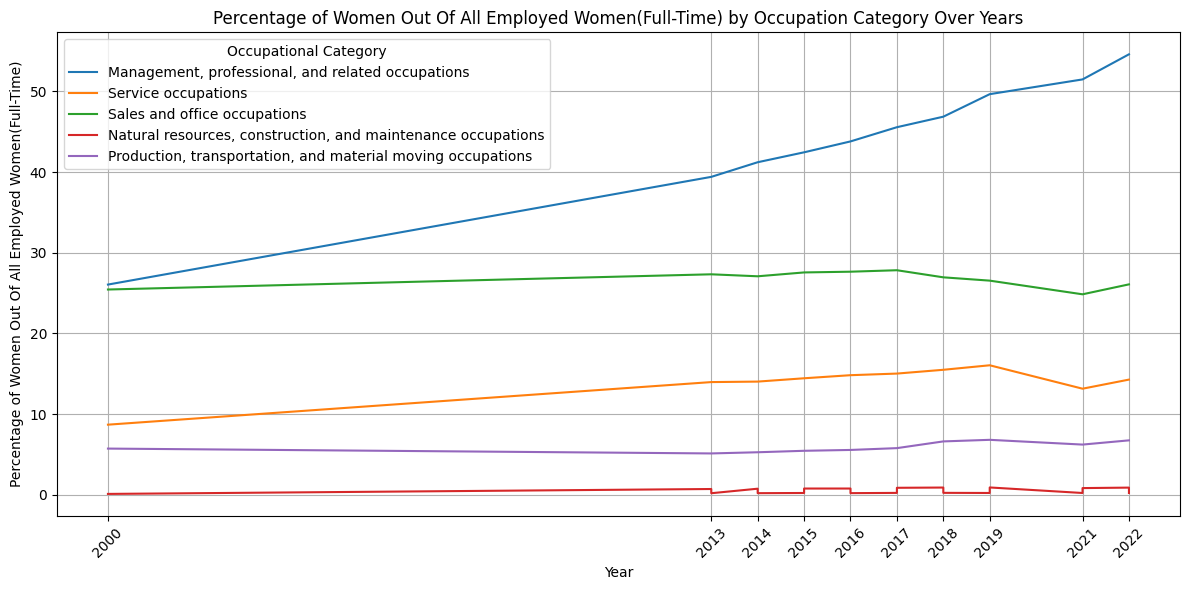

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Define the list of standard occupation categories
occupation_categories = [
    "Management, professional, and related occupations",
    "Service occupations",
    "Sales and office occupations",
    "Natural resources, construction, and maintenance occupations",
    "Production, transportation, and material moving occupations"
]

# Define a mapping dictionary to treat specific names as equivalent
occupation_mapping = {
    "management business science and arts occupations": "management professional and related occupations",
    "farming fishing and forestry occupations": "natural resources construction and maintenance occupations"
}

# Function to clean and standardize text by removing non-alphanumeric characters except spaces
def standardize_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove all non-alphanumeric characters except spaces
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # Remove extra whitespace and strip leading/trailing spaces
    return ' '.join(text.split())

# Apply standardization to the occupation categories list
occupation_categories_standardized = [standardize_text(occupation) for occupation in occupation_categories]

# Standardize 'Occupational Category' column in combined_df
combined_df['Occupational Category'] = combined_df['Occupational Category'].apply(standardize_text)

# Apply the mapping to treat specific names as equivalent
combined_df['Occupational Category'] = combined_df['Occupational Category'].replace(occupation_mapping)

# Ensure 'Year' column is numeric for proper sorting
combined_df['Year'] = pd.to_numeric(combined_df['Year'], errors='coerce')

# Filter combined_df to include only the relevant occupation categories
filtered_df_graph = combined_df[combined_df['Occupational Category'].isin(occupation_categories_standardized)]

# Get the unique years and sort them to ensure order
years = sorted(filtered_df_graph['Year'].dropna().unique())

# Plot Women_Percentage_Out_Of_All_Women across years for each occupation category
plt.figure(figsize=(12, 6))
for occupation, standardized_occupation in zip(occupation_categories, occupation_categories_standardized):
    subset = filtered_df_graph[filtered_df_graph['Occupational Category'] == standardized_occupation]
    # Sort subset by 'Year' to ensure proper order in plotting
    subset = subset.sort_values(by='Year')
    plt.plot(subset['Year'], subset['Women_Percentage_Out_Of_All_Women'], label=occupation)

# Set x-axis ticks to show each year
plt.xticks(years, rotation=45)  # Rotate labels for better readability

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Percentage of Women Out Of All Employed Women(Full-Time)")
plt.title("Percentage of Women Out Of All Employed Women(Full-Time) by Occupation Category Over Years")
plt.legend(title="Occupational Category")
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit rotated labels
plt.show()

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'Women_Percentage_in_Group_Estimate' and 'Exposure Score * 100' columns exist
if 'Women_Percentage_in_Group_Estimate' in final_merged_df.columns and 'Exposure Score * 100' in final_merged_df.columns:
    # Scatter plot data, dropping rows where either x or y is NaN
    plot_df = final_merged_df.dropna(subset=['Exposure Score * 100', 'Percent of Women in Each Occupation 2022'])
    x = plot_df['Exposure Score * 100']
    y = plot_df['Percent of Women in Each Occupation 2022']

    # Generate scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.6, label="Data Points")

    # Calculate and plot regression line
    slope, intercept = np.polyfit(x, y, 1)  # Fit a linear regression
    plt.plot(x, slope * x + intercept, color='red', label="Regression Line")

    # Labels and title
    plt.xlabel('Exposure Score')
    plt.ylabel('Women Percentage in Group (%)')
    plt.title('Percent of Women in Each Occupation 2022 vs. Exposure Score')
    plt.legend()
    plt.grid(True)

    # Display the regression line formula on the plot
    formula_text = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.text(0.05, 0.95, formula_text, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', color='red', bbox=dict(facecolor='white', alpha=0.5))

    plt.show()
else:
    print("Required columns 'Percent of Women in Each Occupation 2022' or 'Exposure Score * 100' are missing in final_merged_df.")

Required columns 'Percent of Women in Each Occupation 2022' or 'Exposure Score * 100' are missing in final_merged_df.


In [30]:
final_merged_df.columns

Index(['Occupational Category', 'Total_FullTime_Workers_Estimate',
       'Total_FullTime_Workers_MOE3', 'Men_FullTime_Workers',
       'Men_FullTime_Workers_MOE3', 'Women_FullTime_Workers',
       'Women_FullTime_Workers_MOE3',
       'Percent of Women in Each Occupation 2022',
       'Women_Percentage_in_Group_MOE3', 'Total_Median_Earnings_Estimate',
       'Total_Median_Earnings_MOE3', 'Men_Median_Earnings_Estimate',
       'Men_Median_Earnings_MOE3', 'Women_Median_Earnings_Estimate',
       'Women_Median_Earnings_MOE3',
       'Women_Earnings_as_Percentage_of_Men_Estimate',
       'Women_Earnings_as_Percentage_of_Men_MOE3', 'Year',
       'Women_Percentage_Out_Of_All_Women',
       'Standardized_Occupational_Category', 'O*NET-SOC 2019 Code',
       'O*NET-SOC 2019 Title', '2018 SOC Code', '2018 SOC Title',
       'Standardized_Occupation_Name', 'Total Employed_2023',
       'Percent of Women in Each Occupation 2023', 'Occupation Name',
       'Exposure Score', 'Exposure Score * 100

# assign main category and aggregate

In [31]:
import pandas as pd

# Convert relevant columns to numeric, setting errors='coerce' to replace non-numeric values with NaN
numeric_columns = [
    'Exposure Score', 'Total_FullTime_Workers_Estimate'
]
for col in numeric_columns:
    final_merged_df[col] = pd.to_numeric(final_merged_df[col], errors='coerce')

# Fill NaN values with 0, or an alternative value if needed
final_merged_df[numeric_columns] = final_merged_df[numeric_columns].fillna(0)

# Define the ordered list of main occupation categories with the updated marker
occupation_categories = [
    "management business science and arts occupations",  # Updated marker
    "service occupations",
    "sales and office occupations",
    "natural resources construction and maintenance occupations",
    "production transportation and material moving occupations"
]

# Initialize the main category column with None
final_merged_df['main category'] = None

# Variable to track the current main category
current_category = None

# Iterate through each row by index to assign categories based on position
for index, row in final_merged_df.iterrows():
    # Standardize 'Occupational Category' to lowercase and strip whitespace
    occupation_category = str(row['Occupational Category']).strip().lower()
    
    # Check if the row is a category marker
    if occupation_category in occupation_categories:
        # Update current category when a new marker is found
        current_category = occupation_category
    
    # Assign the current category to the row if it's not a marker
    final_merged_df.at[index, 'main category'] = current_category

# Check for any rows that didn't get assigned a main category and log them for debugging
missing_categories = final_merged_df[final_merged_df['main category'].isnull()]
if not missing_categories.empty:
    print("Rows missing main category assignment:")
    print(missing_categories[['Occupational Category', 'main category']])

# Filter out rows that are just category markers themselves
filtered_df_agg = final_merged_df[~final_merged_df['Occupational Category'].isin(occupation_categories)]

# Define a function to calculate weighted averages for exposure score and assign income estimates directly
def calculate_averages(group):
    # Weighted average exposure score calculation using number of full-time women workers
    weighted_exposure = (group['Exposure Score'] * group['Women_FullTime_Workers']).sum() / group['Women_FullTime_Workers'].sum()
    
    # Assign income estimates directly by taking the first value within the group
    total_income = group['Total_Median_Earnings_Estimate'].iloc[0]
    men_income = group['Men_Median_Earnings_Estimate'].iloc[0]
    women_income = group['Women_Median_Earnings_Estimate'].iloc[0]
    
    # Directly assign values for Women Percentage, Percent of Women in Each Occupation 2022, and 2023
    women_percentage = group['Women_Percentage_Out_Of_All_Women'].iloc[0]
    women_percent_2022 = group['Percent of Women in Each Occupation 2022'].iloc[0]
    women_percent_2023 = group['Percent of Women in Each Occupation 2023'].iloc[0]
    
    return pd.Series({
        'weighted avg exposure score': weighted_exposure,
        'Total_Median_Earnings_Estimate': total_income,
        'Men_Median_Earnings_Estimate': men_income,
        'Women_Median_Earnings_Estimate': women_income,
        'Women_Percentage_Out_Of_All_Women': women_percentage,
        'Percent of Women in Each Occupation 2022': women_percent_2022,
        'Percent of Women in Each Occupation 2023': women_percent_2023
    })

# Group by 'main category' and apply the averaging function
averages = filtered_df_agg.groupby('main category').apply(calculate_averages).reset_index()
averages

# averages.to_excel('/Users/twylazhang/Desktop/Directed Research/gender distribution/output/weighted_avg_exposure_scores.xlsx', index=False)

Rows missing main category assignment:
  Occupational Category main category
0                 Total          None


/var/folders/cj/742s04b178ld3v0xjpn8xzt80000gn/T/ipykernel_2570/1560693464.py:76: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  averages = filtered_df_agg.groupby('main category').apply(calculate_averages).reset_index()


,main category,weighted avg exposure score,Total_Median_Earnings_Estimate,Men_Median_Earnings_Estimate,Women_Median_Earnings_Estimate,Women_Percentage_Out_Of_All_Women,Percent of Women in Each Occupation 2022,Percent of Women in Each Occupation 2023
0,management business science and arts occupations,0.000026,78838.0,92092.0,68211.0,54.578185,49.5,51.8
1,natural resources construction and maintenance...,0.000032,51155.0,51568.0,37784.0,0.907260,4.2,5.8
2,production transportation and material moving ...,0.000028,43376.0,46944.0,35409.0,6.759734,21.8,24.9
3,sales and office occupations,0.000040,47167.0,56483.0,42390.0,26.082722,58.7,60.6
4,service occupations,0.000036,36225.0,41475.0,31960.0,14.286083,49.8,57.2


/var/folders/cj/742s04b178ld3v0xjpn8xzt80000gn/T/ipykernel_2570/3448592187.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  averages = filtered_df_agg.groupby('main category').apply(calculate_averages).reset_index()


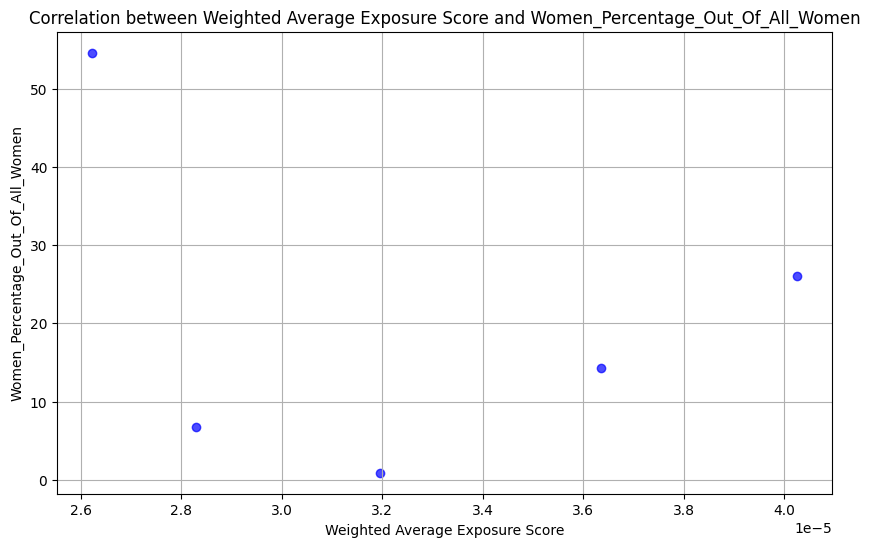

In [32]:
# Apply the function to calculate both metrics
averages = filtered_df_agg.groupby('main category').apply(calculate_averages).reset_index()

# Plotting the correlation between the weighted average exposure score and Women_Percentage_in_Group_Estimate
plt.figure(figsize=(10, 6))
plt.scatter(averages['weighted avg exposure score'], averages['Women_Percentage_Out_Of_All_Women'], color='blue', alpha=0.7)
plt.title('Correlation between Weighted Average Exposure Score and Women_Percentage_Out_Of_All_Women')
plt.xlabel('Weighted Average Exposure Score')
plt.ylabel('Women_Percentage_Out_Of_All_Women')
plt.grid(True)
plt.show()

/var/folders/cj/742s04b178ld3v0xjpn8xzt80000gn/T/ipykernel_2570/4020753920.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  averages = filtered_df_agg.groupby('main category').apply(calculate_averages).reset_index()


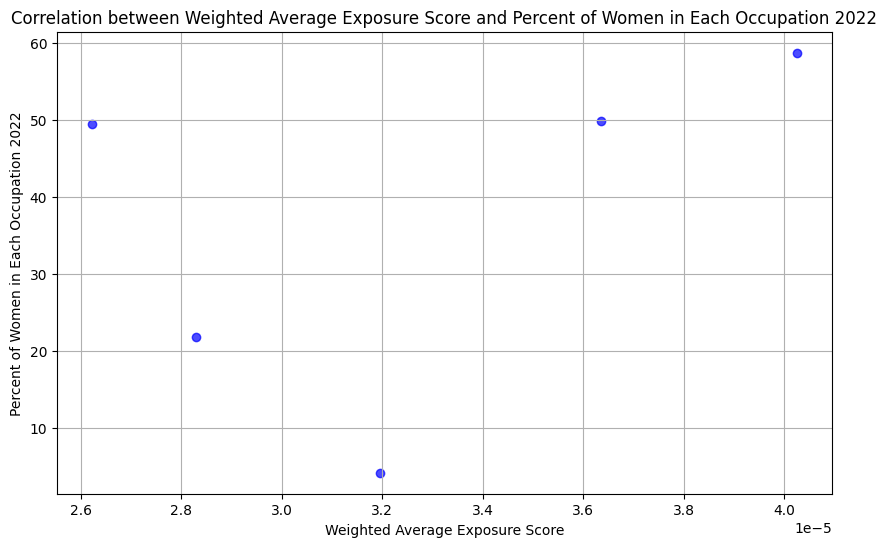

In [33]:
# Apply the function to calculate both metrics
averages = filtered_df_agg.groupby('main category').apply(calculate_averages).reset_index()

# Plotting the correlation between the weighted average exposure score and Women_Percentage_in_Group_Estimate
plt.figure(figsize=(10, 6))
plt.scatter(averages['weighted avg exposure score'], averages['Percent of Women in Each Occupation 2022'], color='blue', alpha=0.7)
plt.title('Correlation between Weighted Average Exposure Score and Percent of Women in Each Occupation 2022')
plt.xlabel('Weighted Average Exposure Score')
plt.ylabel('Percent of Women in Each Occupation 2022')
plt.grid(True)
plt.show()

/var/folders/cj/742s04b178ld3v0xjpn8xzt80000gn/T/ipykernel_2570/1043448361.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  averages = filtered_df_agg.groupby('main category').apply(calculate_averages).reset_index()


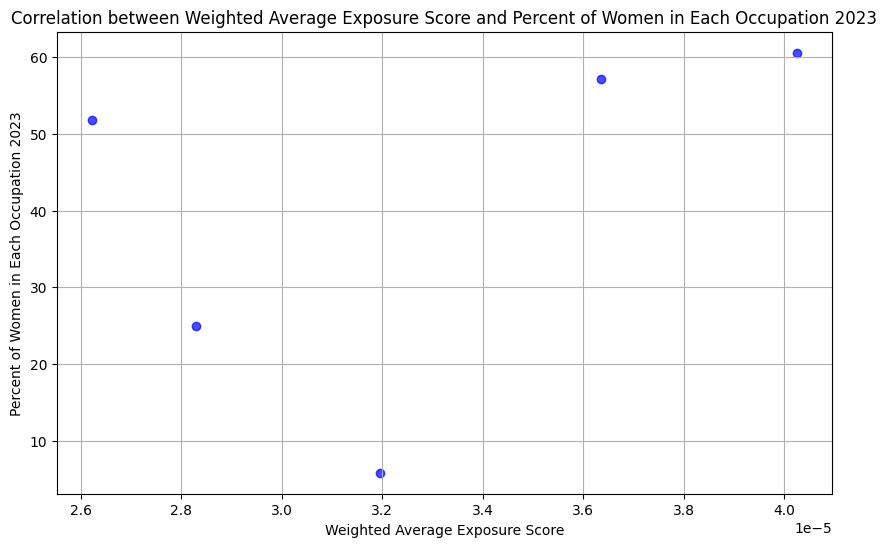

In [34]:
# Apply the function to calculate both metrics
averages = filtered_df_agg.groupby('main category').apply(calculate_averages).reset_index()

# Plotting the correlation between the weighted average exposure score and Women_Percentage_in_Group_Estimate
plt.figure(figsize=(10, 6))
plt.scatter(averages['weighted avg exposure score'], averages['Percent of Women in Each Occupation 2023'], color='blue', alpha=0.7)
plt.title('Correlation between Weighted Average Exposure Score and Percent of Women in Each Occupation 2023')
plt.xlabel('Weighted Average Exposure Score')
plt.ylabel('Percent of Women in Each Occupation 2023')
plt.grid(True)
plt.show()

filtered graph

In [35]:
# Ensure 'Women_Percentage_in_Group_Estimate' and 'Exposure Score * 100' columns exist
if 'Women_Percentage_in_Group_Estimate' in final_merged_df.columns and 'Exposure Score * 100' in final_merged_df.columns:
    # Scatter plot data: drop rows with NaN in x or y, filter for Women_Percentage_in_Group_Estimate > 0.3,
    # and exclude rows with main category = "sales and office occupations" or "natural resources construction and maintenance occupations"
    plot_df = final_merged_df.dropna(subset=['Exposure Score * 100', 'Percent of Women in Each Occupation 2022'])
    plot_df = plot_df[(~plot_df['main category'].isin(['sales and office occupations', 'natural resources construction and maintenance occupations']))]
    
    x = plot_df['Exposure Score * 100']
    y = plot_df['Percent of Women in Each Occupation 2022']

    # Generate scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.6, label="Data Points")

    # Calculate and plot regression line
    slope, intercept = np.polyfit(x, y, 1)  # Fit a linear regression
    plt.plot(x, slope * x + intercept, color='red', label="Regression Line")

    # Labels and title
    plt.xlabel('Exposure Score')
    plt.ylabel('Percent of Women in Each Occupation 2022 (%)')
    plt.title('Percent of Women in Each Occupation 2022 vs. Exposure Score (Filtered: > 0.3)')
    plt.legend()
    plt.grid(True)

    # Display the regression line formula on the plot
    formula_text = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.text(0.05, 0.95, formula_text, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', color='red', bbox=dict(facecolor='white', alpha=0.5))

    plt.show()
else:
    print("Required columns 'Percent of Women in Each Occupation 2022' or 'Exposure Score * 100' are missing in final_merged_df.")

Required columns 'Percent of Women in Each Occupation 2022' or 'Exposure Score * 100' are missing in final_merged_df.


In [36]:
# Convert relevant columns to numeric, setting errors='coerce' to replace non-numeric values with NaN
numeric_columns = ['Women_Median_Earnings_Estimate']
final_merged_df[numeric_columns] = final_merged_df[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Define the list of main occupation categories as markers
occupation_categories = [
    "management business science and arts occupations",
    "service occupations",
    "sales and office occupations",
    "natural resources construction and maintenance occupations",
    "production transportation and material moving occupations"
]

# Initialize the main category column with None
final_merged_df['main category'] = None

# Track the current main category to assign to rows
current_category = None

# Assign categories based on markers
for index, row in final_merged_df.iterrows():
    # Standardize 'Occupational Category' to lowercase and strip whitespace
    occupation_category = str(row['Occupational Category']).strip().lower()
    
    # Update current category if a category marker is encountered
    if occupation_category in occupation_categories:
        current_category = occupation_category
    
    # Assign current category to the row if it's not a marker itself
    final_merged_df.at[index, 'main category'] = current_category

# Log any rows missing a main category for debugging
missing_categories = final_merged_df[final_merged_df['main category'].isnull()]
if not missing_categories.empty:
    print("Rows missing main category assignment:")
    print(missing_categories[['Occupational Category', 'main category']])

# Filter out rows that are only category markers
filtered_df_markers = final_merged_df[~final_merged_df['Occupational Category'].isin(occupation_categories)]

# Define a function to directly assign Women's Median Earnings without aggregation
def assign_women_income(group):
    # Take the first value of Women_Median_Earnings_Estimate for the group
    women_income = group['Women_Median_Earnings_Estimate'].iloc[0]
    
    return pd.Series({
        'Women_Median_Earnings_2021': women_income
    })

# Group by 'main category' and apply the assignment function
women_income2021 = filtered_df_markers.groupby('main category').apply(assign_women_income).reset_index()

# Display the result
women_income2021

# Optionally save the results to an Excel file
# averages.to_excel('/Users/twylazhang/Desktop/Directed Research/gender distribution/output/women_median_earnings_2021.xlsx', index=False)

Rows missing main category assignment:
  Occupational Category main category
0                 Total          None


/var/folders/cj/742s04b178ld3v0xjpn8xzt80000gn/T/ipykernel_2570/3034019769.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  women_income2021 = filtered_df_markers.groupby('main category').apply(assign_women_income).reset_index()


,main category,Women_Median_Earnings_2021
0,management business science and arts occupations,68211.0
1,natural resources construction and maintenance...,37784.0
2,production transportation and material moving ...,35409.0
3,sales and office occupations,42390.0
4,service occupations,31960.0


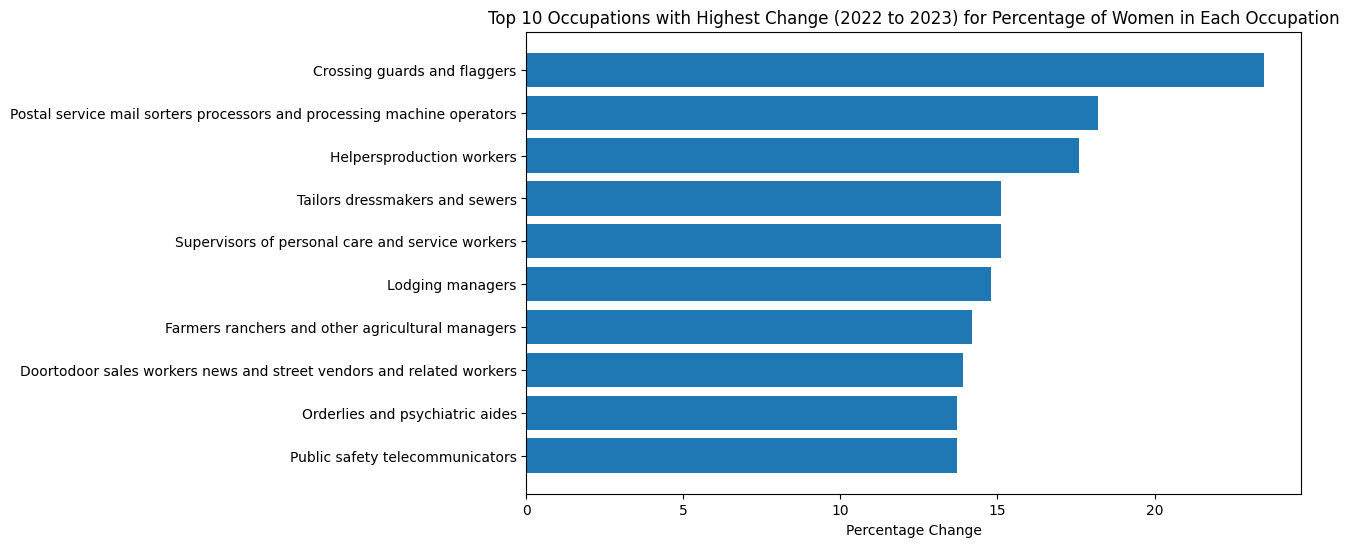

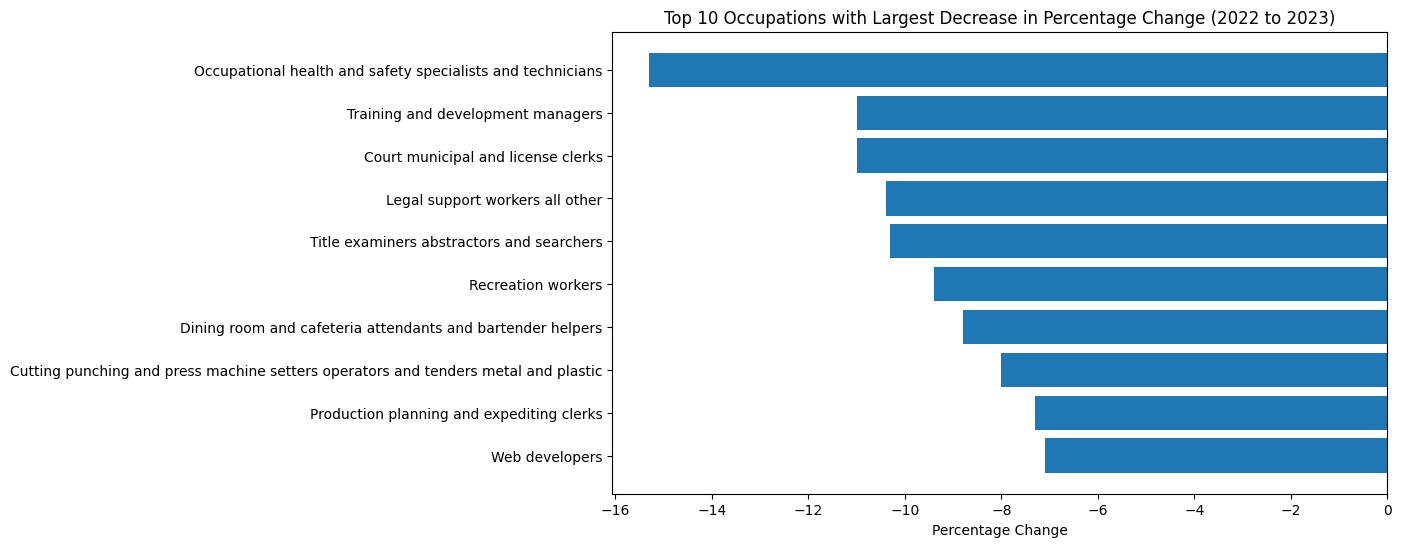

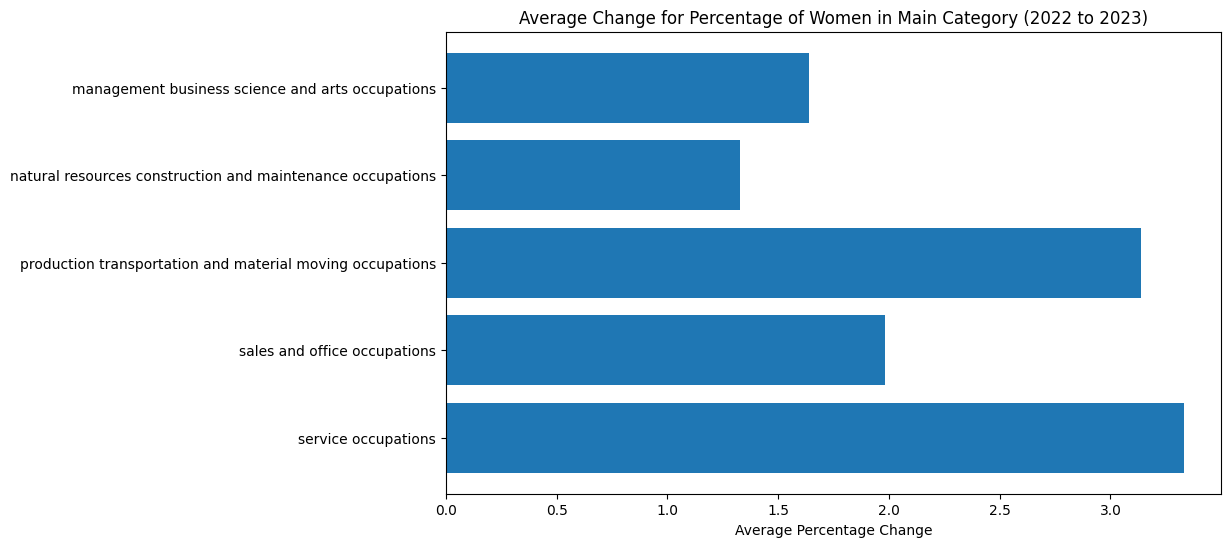

In [37]:
# Convert the relevant columns to numeric, forcing errors to NaN
final_merged_df['Percent of Women in Each Occupation 2022'] = pd.to_numeric(final_merged_df['Percent of Women in Each Occupation 2022'], errors='coerce')
final_merged_df['Percent of Women in Each Occupation 2023'] = pd.to_numeric(final_merged_df['Percent of Women in Each Occupation 2023'], errors='coerce')

# Calculate percentage change again
final_merged_df['Percentage Change'] = final_merged_df['Percent of Women in Each Occupation 2023'] - final_merged_df['Percent of Women in Each Occupation 2022']

# Drop rows with missing values in 'Percentage Change'
data = final_merged_df.dropna(subset=['Percentage Change'])

# Sort by 'Percentage Change' to find the top 10 changes
top_10_changes = data.nlargest(10, 'Percentage Change')

# Plot histogram of the top 10 changes
plt.figure(figsize=(10, 6))
plt.barh(top_10_changes['Occupational Category'], top_10_changes['Percentage Change'])
plt.xlabel('Percentage Change')
plt.title('Top 10 Occupations with Highest Change (2022 to 2023) for Percentage of Women in Each Occupation')
plt.gca().invert_yaxis()
plt.show()

# Identify the top 10 occupations with the largest decrease in percentage change
top_10_decreases = data.nsmallest(10, 'Percentage Change')

# Plot histogram of the top 10 decreases
plt.figure(figsize=(10, 6))
plt.barh(top_10_decreases['Occupational Category'], top_10_decreases['Percentage Change'])
plt.xlabel('Percentage Change')
plt.title('Top 10 Occupations with Largest Decrease in Percentage Change (2022 to 2023)')
plt.gca().invert_yaxis()
plt.show()


# Aggregate the percentage change by main category
category_changes = data.groupby('main category')['Percentage Change'].mean().reset_index()

# Plot the aggregated percentage change by main category
plt.figure(figsize=(10, 6))
plt.barh(category_changes['main category'], category_changes['Percentage Change'])
plt.xlabel('Average Percentage Change')
plt.title('Average Change for Percentage of Women in Main Category (2022 to 2023)')
plt.gca().invert_yaxis()

/var/folders/cj/742s04b178ld3v0xjpn8xzt80000gn/T/ipykernel_2570/2071001658.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Exposure Level'] = pd.cut(data['Exposure Score * 100'], bins=percentiles, labels=exposure_labels, include_lowest=True)


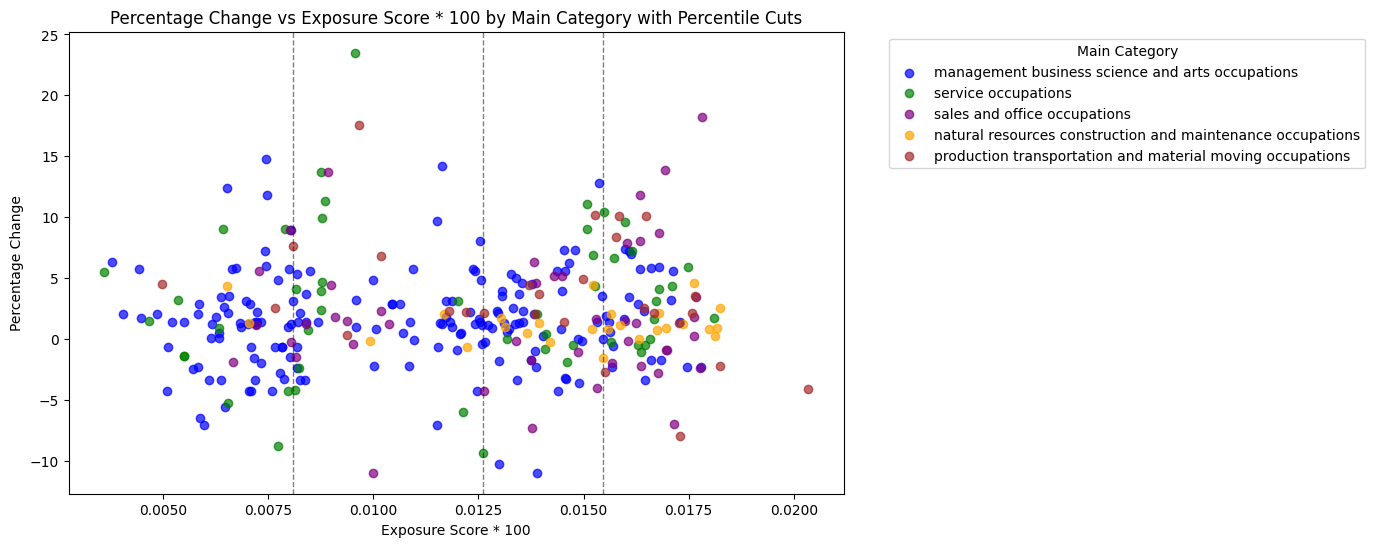

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define high-contrast color palette
high_contrast_colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'cyan', 'magenta', 'lime']

# Define main categories and assign colors
main_categories = data['main category'].unique()
category_colors = {category: high_contrast_colors[i % len(high_contrast_colors)] for i, category in enumerate(main_categories)}

# Define exposure levels based on percentiles
percentiles = np.percentile(data['Exposure Score * 100'].dropna(), [0, 25, 50, 75, 100])
exposure_labels = ['Low', 'Moderate', 'High', 'Very High']
data['Exposure Level'] = pd.cut(data['Exposure Score * 100'], bins=percentiles, labels=exposure_labels, include_lowest=True)

# Plot Percentage Change against Exposure Score * 100 with high-contrast colors by main category
plt.figure(figsize=(10, 6))
for category in main_categories:
    subset = data[data['main category'] == category]
    plt.scatter(subset['Exposure Score * 100'], subset['Percentage Change'], label=category, color=category_colors[category], alpha=0.7)
for percentile in percentiles[1:-1]:
    plt.axvline(x=percentile, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.xlabel('Exposure Score * 100')
plt.ylabel('Percentage Change')
plt.title('Percentage Change vs Exposure Score * 100 by Main Category with Percentile Cuts')
plt.legend(title='Main Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

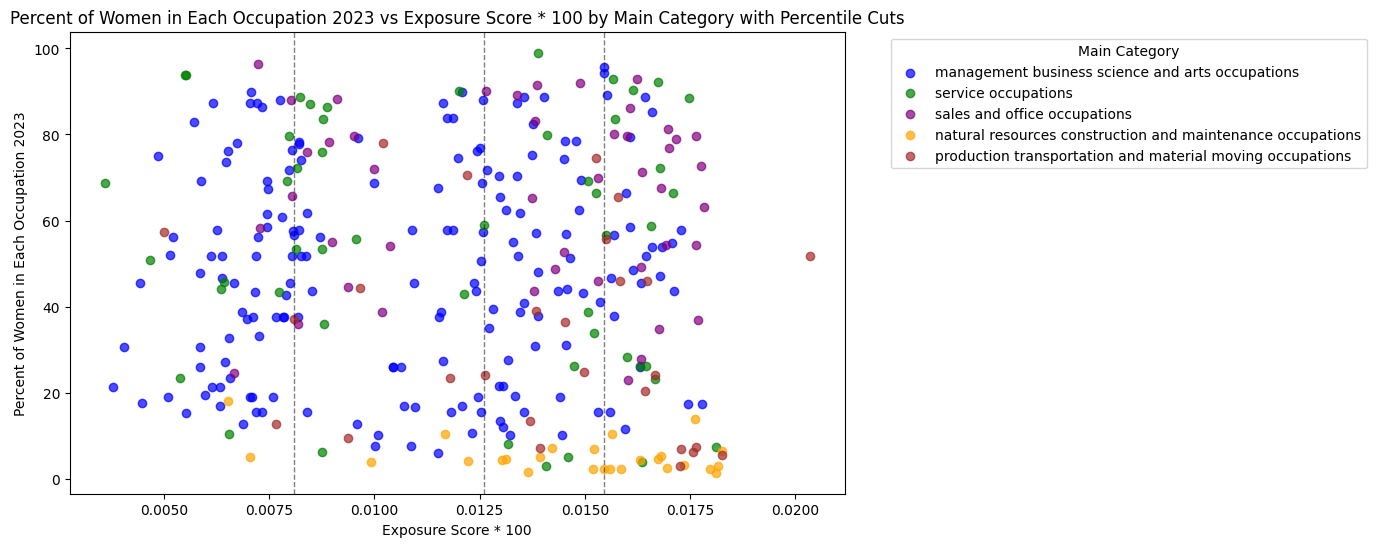

In [39]:
# Plot Percent of Women in Each Occupation 2023 against Exposure Score * 100 by main category
plt.figure(figsize=(10, 6))
for category in main_categories:
    subset = data[data['main category'] == category]
    plt.scatter(subset['Exposure Score * 100'], subset['Percent of Women in Each Occupation 2023'], label=category, color=category_colors[category], alpha=0.7)
for percentile in percentiles[1:-1]:
    plt.axvline(x=percentile, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.xlabel('Exposure Score * 100')
plt.ylabel('Percent of Women in Each Occupation 2023')
plt.title('Percent of Women in Each Occupation 2023 vs Exposure Score * 100 by Main Category with Percentile Cuts')
plt.legend(title='Main Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

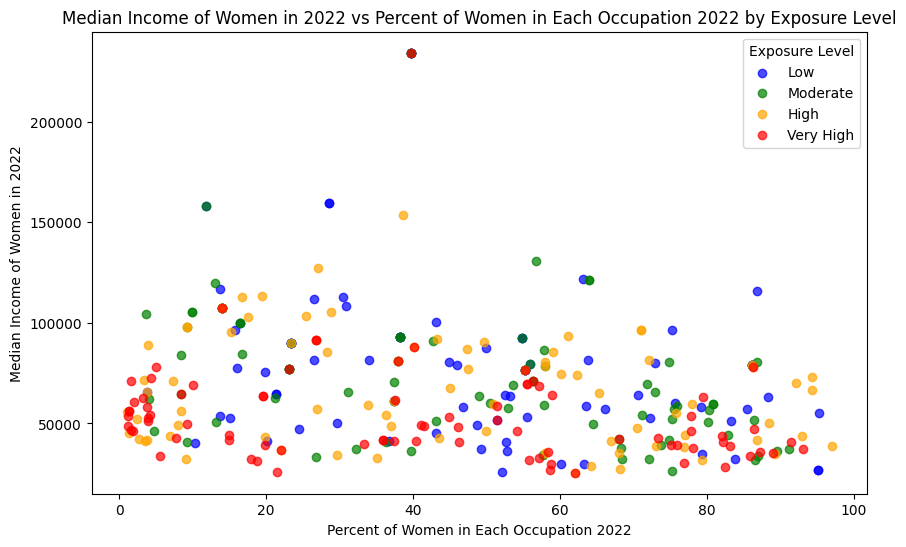

In [40]:
# Define exposure level colors for scatter plot of Median Income against Percent of Women
exposure_colors = {'Low': 'blue', 'Moderate': 'green', 'High': 'orange', 'Very High': 'red'}

# Plot Median Income of Women in 2022 against Percent of Women in Each Occupation 2022 by exposure level
plt.figure(figsize=(10, 6))
for level in exposure_labels:
    subset = data[data['Exposure Level'] == level]
    plt.scatter(subset['Percent of Women in Each Occupation 2022'], subset['Total_Median_Earnings_Estimate'], label=level, color=exposure_colors[level], alpha=0.7)
plt.xlabel('Percent of Women in Each Occupation 2022')
plt.ylabel('Median Income of Women in 2022')
plt.title('Median Income of Women in 2022 vs Percent of Women in Each Occupation 2022 by Exposure Level')
plt.legend(title='Exposure Level')
plt.show()

In [41]:
# Calculate the correlation matrix for all variables in the dataset
correlation_matrix = final_merged_df.corr(numeric_only=True)

# Display the correlation matrix
correlation_matrix

,Total_FullTime_Workers_Estimate,Total_FullTime_Workers_MOE3,Men_FullTime_Workers,Men_FullTime_Workers_MOE3,Women_FullTime_Workers,Women_FullTime_Workers_MOE3,Percent of Women in Each Occupation 2022,Women_Percentage_in_Group_MOE3,Women_Median_Earnings_Estimate,Women_Percentage_Out_Of_All_Women,Total Employed_2023,Percent of Women in Each Occupation 2023,Exposure Score,Exposure Score * 100,Percentage Change
Total_FullTime_Workers_Estimate,1.000000,0.797397,0.990994,0.734501,0.986831,0.780715,0.024447,-0.147661,0.008578,0.986831,0.982599,0.006820,-0.158509,-0.173876,0.026412
Total_FullTime_Workers_MOE3,0.797397,1.000000,0.788948,0.971508,0.788428,0.938774,0.041999,-0.386922,0.065530,0.788428,0.760691,-0.030068,-0.253489,-0.181762,0.000467
Men_FullTime_Workers,0.990994,0.788948,1.000000,0.750077,0.956284,0.741423,-0.014513,-0.150569,0.007792,0.956284,0.979579,-0.038076,-0.161309,-0.140876,0.028503
Men_FullTime_Workers_MOE3,0.734501,0.971508,0.750077,1.000000,0.698023,0.842034,-0.104560,-0.396659,0.080318,0.698023,0.697228,-0.197729,-0.260418,-0.146160,0.009504
Women_FullTime_Workers,0.986831,0.788428,0.956284,0.698023,1.000000,0.809405,0.070923,-0.140596,0.009320,1.000000,0.963934,0.061207,-0.151314,-0.170165,0.023266
Women_FullTime_Workers_MOE3,0.780715,0.938774,0.741423,0.842034,0.809405,1.000000,0.250673,-0.353725,0.061123,0.809405,0.762193,0.213987,-0.239212,-0.221188,-0.004823
Percent of Women in Each Occupation 2022,0.024447,0.041999,-0.014513,-0.104560,0.070923,0.250673,1.000000,0.088348,0.017684,0.070923,0.021437,0.985814,-0.008501,-0.187287,-0.015097
Women_Percentage_in_Group_MOE3,-0.147661,-0.386922,-0.150569,-0.396659,-0.140596,-0.353725,0.088348,1.000000,-0.152792,-0.140596,-0.144961,0.242153,0.121121,0.087276,0.249889
Women_Median_Earnings_Estimate,0.008578,0.065530,0.007792,0.080318,0.009320,0.061123,0.017684,-0.152792,1.000000,0.009320,-0.004041,-0.082274,-0.040969,-0.248994,-0.066828
Women_Percentage_Out_Of_All_Women,0.986831,0.788428,0.956284,0.698023,1.000000,0.809405,0.070923,-0.140596,0.009320,1.000000,0.963934,0.061207,-0.151314,-0.170165,0.023266


In [42]:
# Find correlations with absolute values greater than 0.5
high_correlation_pairs = correlation_matrix.stack().reset_index()
high_correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_correlation_pairs = high_correlation_pairs[(high_correlation_pairs['Correlation'].abs() > 0.5) & (high_correlation_pairs['Variable 1'] != high_correlation_pairs['Variable 2'])]

# Display the results
high_correlation_pairs.drop_duplicates(subset=['Correlation'], keep='first')

,Variable 1,Variable 2,Correlation
1,Total_FullTime_Workers_Estimate,Total_FullTime_Workers_MOE3,0.797397
2,Total_FullTime_Workers_Estimate,Men_FullTime_Workers,0.990994
3,Total_FullTime_Workers_Estimate,Men_FullTime_Workers_MOE3,0.734501
4,Total_FullTime_Workers_Estimate,Women_FullTime_Workers,0.986831
5,Total_FullTime_Workers_Estimate,Women_FullTime_Workers_MOE3,0.780715
9,Total_FullTime_Workers_Estimate,Women_Percentage_Out_Of_All_Women,0.986831
10,Total_FullTime_Workers_Estimate,Total Employed_2023,0.982599
17,Total_FullTime_Workers_MOE3,Men_FullTime_Workers,0.788948
18,Total_FullTime_Workers_MOE3,Men_FullTime_Workers_MOE3,0.971508
19,Total_FullTime_Workers_MOE3,Women_FullTime_Workers,0.788428


In [43]:
final_merged_df.to_csv('/Users/twylazhang/Desktop/Directed Research/gender distribution/output/final_merged_df.csv', index=False)
final_merged_df.to_excel('/Users/twylazhang/Desktop/Directed Research/gender distribution/output/final_merged_df.xlsx', index=False)


original

# Data Analysis

In [44]:
final_merged_df.columns

Index(['Occupational Category', 'Total_FullTime_Workers_Estimate',
       'Total_FullTime_Workers_MOE3', 'Men_FullTime_Workers',
       'Men_FullTime_Workers_MOE3', 'Women_FullTime_Workers',
       'Women_FullTime_Workers_MOE3',
       'Percent of Women in Each Occupation 2022',
       'Women_Percentage_in_Group_MOE3', 'Total_Median_Earnings_Estimate',
       'Total_Median_Earnings_MOE3', 'Men_Median_Earnings_Estimate',
       'Men_Median_Earnings_MOE3', 'Women_Median_Earnings_Estimate',
       'Women_Median_Earnings_MOE3',
       'Women_Earnings_as_Percentage_of_Men_Estimate',
       'Women_Earnings_as_Percentage_of_Men_MOE3', 'Year',
       'Women_Percentage_Out_Of_All_Women',
       'Standardized_Occupational_Category', 'O*NET-SOC 2019 Code',
       'O*NET-SOC 2019 Title', '2018 SOC Code', '2018 SOC Title',
       'Standardized_Occupation_Name', 'Total Employed_2023',
       'Percent of Women in Each Occupation 2023', 'Occupation Name',
       'Exposure Score', 'Exposure Score * 100

In [45]:
# Calculate percentile-based cutoffs for the scaled 'Exposure Score * 100'
min_value = final_merged_df['Exposure Score * 100'].min()
q25 = final_merged_df['Exposure Score * 100'].quantile(0.25)
median = final_merged_df['Exposure Score * 100'].quantile(0.50)
q75 = final_merged_df['Exposure Score * 100'].quantile(0.75)
max_value = final_merged_df['Exposure Score * 100'].max()

# Define AI exposure categories without using duplicates='drop'
final_merged_df['AI_Exposure_Level'] = pd.cut(
    final_merged_df['Exposure Score * 100'],
    bins=[min_value, q25, median, q75, max_value],
    labels=['Low', 'Medium-Low', 'Medium-High', 'High'],
    include_lowest=True
)

# Proceed with filtering and analysis
high_ai_exposure_df = final_merged_df[final_merged_df['AI_Exposure_Level'] == 'High']

# Select relevant columns for the filtered data
selected_columns_high = high_ai_exposure_df[[
    'Occupational Category', 
    'main category', 
    'Women_Median_Earnings_Estimate', 
    'Women_Percentage_Out_Of_All_Women', 
    'Percent of Women in Each Occupation 2023', 
    'Percent of Women in Each Occupation 2022'
]]

# Calculate and print the number of occupations and the sum of Women_Percentage_Out_Of_All_Women
number_of_occupations_high = high_ai_exposure_df['Occupational Category'].nunique()
total_women_percentage_out_of_all_women_high = high_ai_exposure_df['Women_Percentage_Out_Of_All_Women'].sum()

# Display the results
print("Number of Occupations in High AI Exposure Level (75th Percentile or Higher):", number_of_occupations_high)
print("Total Women Percentage Out Of All Women:", total_women_percentage_out_of_all_women_high)
print("\nDetails of Occupations in High AI Exposure Level:")
print(selected_columns_high)

Number of Occupations in High AI Exposure Level (75th Percentile or Higher): 122
Total Women Percentage Out Of All Women: 15.506309940723327

Details of Occupations in High AI Exposure Level:
                                 Occupational Category  \
71                                 Compliance officers   
88           Business operations specialists all other   
100                                      Tax preparers   
123                     Computer occupations all other   
135                                      Statisticians   
..                                                 ...   
701      Conveyor dredge and hoist and winch operators   
703                 Cleaners of vehicles and equipment   
705  Laborers and freight stock and material movers...   
706                     Machine feeders and offbearers   
707                         Packers and packagers hand   

                                         main category  \
71    management business science and arts occupation

In [46]:
final_merged_df[final_merged_df['AI_Exposure_Level']]

KeyError: "None of [CategoricalIndex([nan, nan, nan, nan, nan, 'Low', 'Low', 'Low', nan,\n                  'Medium-Low',\n                  ...\n                  'Medium-Low', 'High', 'Medium-Low', 'High', 'High', 'High',\n                  'Medium-High', nan, 'Low', nan],\n                 categories=['Low', 'Medium-Low', 'Medium-High', 'High'], ordered=True, dtype='category', length=712)] are in the [columns]"

In [ ]:
# Proceed with filtering and analysis
medium_high_ai_exposure_df = final_merged_df[final_merged_df['AI_Exposure_Level'] == 'Medium-High']

# Select relevant columns for the filtered data
selected_columns_medium = medium_high_ai_exposure_df[[
    'Occupational Category', 
    'main category', 
    'Women_Median_Earnings_Estimate', 
    'Women_Percentage_Out_Of_All_Women', 
    'Percent of Women in Each Occupation 2023', 
    'Percent of Women in Each Occupation 2022'
]]

# Calculate and print the number of occupations and the sum of Women_Percentage_Out_Of_All_Women
medium_high_number_of_occupations = medium_high_ai_exposure_df['Occupational Category'].nunique()
medium_high_total_women_percentage_out_of_all_women = medium_high_ai_exposure_df['Women_Percentage_Out_Of_All_Women'].sum()

# Display the results
print("Number of Occupations in medium_high_ AI Exposure Level (50th-75th Percentile or Higher):", medium_high_number_of_occupations)
print("Total Women Percentage Out Of All Women:", medium_high_total_women_percentage_out_of_all_women)
print("\nDetails of Occupations in medium_high AI Exposure Level:")
print(selected_columns_medium)

Number of Occupations in medium_high_ AI Exposure Level (50th-75th Percentile or Higher): 120
Total Women Percentage Out Of All Women: 22.981702752177746

Details of Occupations in medium_high AI Exposure Level:
                 Occupational Category  \
22   Training and development managers   
27      Industrial production managers   
37               Food service managers   
44           Natural sciences managers   
78                        Logisticians   
..                                 ...   
691                     Ship engineers   
692                 Parking attendants   
695          Transportation inspectors   
696          Transportation inspectors   
708         Stockers and order fillers   

                                         main category  \
22    management business science and arts occupations   
27    management business science and arts occupations   
37    management business science and arts occupations   
44    management business science and arts occupati

In [ ]:
selected_columns_medium['Occupational Category'].unique()

array(['Training and development managers',
       'Industrial production managers', 'Food service managers',
       'Natural sciences managers', 'Logisticians',
       'Market research analysts and marketing specialists',
       'Accountants and auditors', 'Credit analysts',
       'Insurance underwriters', 'Computer systems analysts',
       'Software quality assurance analysts and testers',
       'Database administrators and architects', 'Statisticians',
       'Architects except landscape and naval', 'Agricultural engineers',
       'Bioengineers and biomedical engineers', 'Mechanical engineers',
       'Engineers all other',
       'Environmental scientists and specialists including health',
       'Physical scientists all other',
       'Clinical and counseling psychologists', 'Other psychologists',
       'Biological technicians', 'Nuclear technicians',
       'Marriage and family therapists',
       'Social and human service assistants',
       'Librarians and media collection

In [ ]:
# Calculate percentile-based cutoffs for 'Women_Median_Earnings_Estimate'
min_value = final_merged_df['Women_Median_Earnings_Estimate'].min()
q25 = final_merged_df['Women_Median_Earnings_Estimate'].quantile(0.25)
median = final_merged_df['Women_Median_Earnings_Estimate'].quantile(0.50)
q75 = final_merged_df['Women_Median_Earnings_Estimate'].quantile(0.75)
max_value = final_merged_df['Women_Median_Earnings_Estimate'].max()

# Define income level categories based on these cutoffs
final_merged_df['Income_Level'] = pd.cut(
    final_merged_df['Women_Median_Earnings_Estimate'],
    bins=[min_value, q25, median, q75, max_value],
    labels=['Low', 'Medium-Low', 'Medium-High', 'High'],
    include_lowest=True
)

# Display the first few rows to verify the categorization
print(final_merged_df[['Women_Median_Earnings_Estimate', 'Income_Level']].head())

   Women_Median_Earnings_Estimate Income_Level
0                         51400.0   Medium-Low
1                         68211.0  Medium-High
2                         68211.0  Medium-High
3                         74230.0         High
4                         76066.0         High


In [ ]:
# Filter the data for occupations in the "Medium-High" AI Exposure Level
medium_high_ai_exposure_df = final_merged_df[final_merged_df['AI_Exposure_Level'] == 'Medium-High']

# Calculate the distribution of 'Income_Level' within the 'Medium-High' AI Exposure Level group
income_level_distribution_medium_high = medium_high_ai_exposure_df['Income_Level'].value_counts(normalize=True) * 100

# Display the distribution as percentages for each income level
print("Income Level Distribution for Medium-High AI Exposure Level:")
print(income_level_distribution_medium_high)

Income Level Distribution for Medium-High AI Exposure Level:
Income_Level
Medium-Low     31.746032
Low            25.396825
Medium-High    21.428571
High           21.428571
Name: proportion, dtype: float64


In [ ]:
# Filter the data for occupations in the "Medium-High" AI Exposure Level
high_ai_exposure_df = final_merged_df[final_merged_df['AI_Exposure_Level'] == 'High']

# Calculate the distribution of 'Income_Level' within the 'Medium-High' AI Exposure Level group
income_level_distribution_high = high_ai_exposure_df['Income_Level'].value_counts(normalize=True) * 100

# Display the distribution as percentages for each income level
print("Income Level Distribution for High AI Exposure Level:")
print(income_level_distribution_high)

Income Level Distribution for High AI Exposure Level:
Income_Level
Low            37.795276
Medium-Low     29.921260
Medium-High    22.834646
High            9.448819
Name: proportion, dtype: float64


In [ ]:
# import pandas as pd
# import statsmodels.api as sm

# # Assuming 'filtered_df' is your DataFrame containing occupation-specific data
# # Also assuming 'women_median_earnings_2021' is the DataFrame from the previous steps containing 2021 data

# # Merge 'women_median_earnings_2021' with 'filtered_df' to add Women's Median Earnings in 2021
# filtered_df = filtered_df.merge(
#     women_income2021[['main category', 'Women_Median_Earnings_2021']],
#     on='main category',
#     how='left'
# )

# # National-level indicators for 2022
# interest_rate_2022 = 4.25  # Example for December 2022 federal funds rate
# fertility_rate_2022 = 1.665  # Total fertility rate per 1,000 women

# # Add these constants to the DataFrame for all rows (since they apply to all occupations in 2022)
# filtered_df['Interest_Rate'] = interest_rate_2022
# filtered_df['Fertility_Rate'] = fertility_rate_2022

# # Ensure all columns for regression are numeric to prevent dtype issues
# columns_to_numeric = [
#     'Interest_Rate', 'Mortality_Rate', 'Fertility_Rate', 
#     'Women_Median_Earnings_Estimate', 'Women_Percentage_in_Group_Estimate', 
#     'Exposure Score * 100', 'Women_Percentage_Out_Of_All_Women', 
#     'Women_Median_Earnings_2021'
# ]
# filtered_df[columns_to_numeric] = filtered_df[columns_to_numeric].apply(pd.to_numeric, errors='coerce').fillna(0)

# # Define the dependent variable (Y) - e.g., women's median earnings in 2022
# Y = filtered_df['Women_Median_Earnings_Estimate']

# # Define the independent variables (X), including occupation-specific variables, national-level indicators, and 2021 earnings
# X = filtered_df[['Interest_Rate', 'Fertility_Rate', 
#                  'Women_Percentage_in_Group_Estimate', 'Exposure Score * 100', 
#                  'Women_Percentage_Out_Of_All_Women', 'Women_Median_Earnings_2021']]

# # Add a constant to the model for the intercept
# X = sm.add_constant(X)

# # Run the regression model
# model = sm.OLS(Y, X)
# results = model.fit()

# # Display the regression results
# print(results.summary())

exposure interaction

In [ ]:
# import pandas as pd
# import statsmodels.api as sm

# # Assuming 'filtered_df' is your DataFrame and includes the necessary variables

# # Define interaction terms
# filtered_df['Exposure_Women_Percentage_in_Group'] = filtered_df['Exposure Score * 100'] * filtered_df['Women_Percentage_in_Group_Estimate']
# filtered_df['Exposure_Women_Percentage_Out_Of_All'] = filtered_df['Exposure Score * 100'] * filtered_df['Women_Percentage_Out_Of_All_Women']

# # Ensure all columns for regression are numeric
# columns_to_numeric = [
#     'Interest_Rate', 'Mortality_Rate', 'Fertility_Rate', 
#     'Women_Median_Earnings_Estimate', 'Women_Percentage_in_Group_Estimate', 
#     'Exposure Score * 100', 'Women_Percentage_Out_Of_All_Women', 
#     'Women_Median_Earnings_2021', 'Exposure_Women_Percentage_in_Group', 
#     'Exposure_Women_Percentage_Out_Of_All'
# ]
# filtered_df[columns_to_numeric] = filtered_df[columns_to_numeric].apply(pd.to_numeric, errors='coerce').fillna(0)

# # Define the dependent variable (Y) - women's median earnings in 2022
# Y = filtered_df['Women_Median_Earnings_Estimate']

# # Define the independent variables (X), including interaction terms
# X = filtered_df[['Interest_Rate', 'Fertility_Rate', 
#                  'Women_Percentage_in_Group_Estimate', 'Exposure Score * 100', 
#                  'Women_Percentage_Out_Of_All_Women', 'Women_Median_Earnings_2021', 
#                  'Exposure_Women_Percentage_in_Group', 'Exposure_Women_Percentage_Out_Of_All']]

# # Add a constant to the model for the intercept
# X = sm.add_constant(X)

# # Run the regression model
# model = sm.OLS(Y, X)
# results = model.fit()

# # Display the regression results
# print(results.summary())

In [ ]:
# import pandas as pd
# import statsmodels.api as sm

# # Standardize 'main category' column in both DataFrames
# filtered_df['main category'] = filtered_df['main category'].str.strip().str.lower()
# women_income2021['main category'] = women_income2021['main category'].str.strip().str.lower()

# # Drop 'Women_Median_Earnings_2021' if it already exists in filtered_df to avoid duplicate columns during merge
# if 'Women_Median_Earnings_2021' in filtered_df.columns:
#     filtered_df = filtered_df.drop(columns=['Women_Median_Earnings_2021'])

# # Merge the 2021 income data into filtered_df
# filtered_df = filtered_df.merge(
#     women_income2021[['main category', 'Women_Median_Earnings_2021']], 
#     on='main category', 
#     how='left'
# )

# # Verify that 'Women_Median_Earnings_2021' column was added
# if 'Women_Median_Earnings_2021' not in filtered_df.columns:
#     raise KeyError("'Women_Median_Earnings_2021' not found in merged DataFrame")

# # Calculate percentile-based cutoffs for AI Exposure Score
# min_value = filtered_df['Exposure Score * 100'].min()
# q25 = filtered_df['Exposure Score * 100'].quantile(0.25)
# median = filtered_df['Exposure Score * 100'].quantile(0.50)
# q75 = filtered_df['Exposure Score * 100'].quantile(0.75)
# max_value = filtered_df['Exposure Score * 100'].max()

# # Define AI exposure categories based on these cutoffs
# filtered_df['AI_Exposure_Level'] = pd.cut(
#     filtered_df['Exposure Score * 100'],
#     bins=[min_value, q25, median, q75, max_value],
#     labels=['Low', 'Medium-Low', 'Medium-High', 'High'],
#     include_lowest=True
# )

# # Convert AI Exposure Level to dummy variables
# filtered_df = pd.get_dummies(filtered_df, columns=['AI_Exposure_Level'], drop_first=True)

# # Convert boolean dummy variables to integers
# filtered_df[['AI_Exposure_Level_Medium-Low', 'AI_Exposure_Level_Medium-High', 'AI_Exposure_Level_High']] = \
#     filtered_df[['AI_Exposure_Level_Medium-Low', 'AI_Exposure_Level_Medium-High', 'AI_Exposure_Level_High']].astype(int)

# # National-level indicators for 2022
# interest_rate_2022 = 4.25  # Example for December 2022 federal funds rate
# fertility_rate_2022 = 1.665  # Total fertility rate per 1,000 women

# # Add these constants to the DataFrame for all rows (since they apply to all occupations in 2022)
# filtered_df['Interest_Rate'] = interest_rate_2022
# filtered_df['Fertility_Rate'] = fertility_rate_2022

# # Ensure all columns for regression are numeric to prevent dtype issues
# columns_to_numeric = [
#     'Interest_Rate', 'Fertility_Rate', 
#     'Women_Median_Earnings_Estimate', 'Women_Percentage_in_Group_Estimate', 
#     'Women_Percentage_Out_Of_All_Women', 'Women_Median_Earnings_2021',
#     'AI_Exposure_Level_Medium-Low', 'AI_Exposure_Level_Medium-High', 'AI_Exposure_Level_High'
# ]
# filtered_df[columns_to_numeric] = filtered_df[columns_to_numeric].apply(pd.to_numeric, errors='coerce').fillna(0)

# # Define the dependent variable (Y) - Women's Median Earnings in 2022
# Y = filtered_df['Women_Median_Earnings_Estimate']

# # Define the independent variables (X), including the AI exposure level dummies
# X = filtered_df[['Interest_Rate', 'Fertility_Rate', 
#                  'Women_Percentage_in_Group_Estimate', 'Women_Percentage_Out_Of_All_Women', 
#                  'Women_Median_Earnings_2021', 'AI_Exposure_Level_Medium-Low', 
#                  'AI_Exposure_Level_Medium-High', 'AI_Exposure_Level_High']]

# # Add a constant to the model for the intercept
# X = sm.add_constant(X)

# # Run the regression model
# model = sm.OLS(Y, X)
# results = model.fit()

# # Display the regression results
# print(results.summary())

# regression and table

- interest rate
- fertelity rate

- women's medan income across different occupations
- women's percentage across different occupations
- AI exposure score across different occupations
- women employment out of all full_time women workers across different occupations


In [ ]:
# Standardize 'main category' column in both DataFrames
final_merged_df['main category'] = final_merged_df['main category'].str.strip().str.lower()
women_income2021['main category'] = women_income2021['main category'].str.strip().str.lower()

# Drop 'Women_Median_Earnings_2021' if it already exists in filtered_df to avoid duplicate columns during merge
if 'Women_Median_Earnings_2021' in final_merged_df.columns:
    final_merged_df = final_merged_df.drop(columns=['Women_Median_Earnings_2021'])

# Merge the 2021 income data into filtered_df
filtered_df = final_merged_df.merge(
    women_income2021[['main category', 'Women_Median_Earnings_2021']], 
    on='main category', 
    how='left'
)

# Verify that 'Women_Median_Earnings_2021' column was added
if 'Women_Median_Earnings_2021' not in filtered_df.columns:
    raise KeyError("'Women_Median_Earnings_2021' not found in merged DataFrame")

# Calculate percentile-based cutoffs for AI Exposure Score
min_value = filtered_df['Exposure Score * 100'].min()
q25 = filtered_df['Exposure Score * 100'].quantile(0.25)
median = filtered_df['Exposure Score * 100'].quantile(0.50)
q75 = filtered_df['Exposure Score * 100'].quantile(0.75)
max_value = filtered_df['Exposure Score * 100'].max()

# Define AI exposure categories based on these cutoffs
filtered_df['AI_Exposure_Level'] = pd.cut(
    filtered_df['Exposure Score * 100'],
    bins=[min_value, q25, median, q75, max_value],
    labels=['Low', 'Medium-Low', 'Medium-High', 'High'],
    include_lowest=True
)

# Convert AI Exposure Level to dummy variables
filtered_df = pd.get_dummies(filtered_df, columns=['AI_Exposure_Level'], drop_first=True)

# Convert boolean dummy variables to integers
filtered_df[['AI_Exposure_Level_Medium-Low', 'AI_Exposure_Level_Medium-High', 'AI_Exposure_Level_High']] = \
    filtered_df[['AI_Exposure_Level_Medium-Low', 'AI_Exposure_Level_Medium-High', 'AI_Exposure_Level_High']].astype(int)

# National-level indicators for 2022
interest_rate_2022 = 4.25  # Example for December 2022 federal funds rate
fertility_rate_2022 = 1.665  # Total fertility rate per 1,000 women

# Add these constants to the DataFrame for all rows (since they apply to all occupations in 2022)
filtered_df['Interest_Rate'] = interest_rate_2022
filtered_df['Fertility_Rate'] = fertility_rate_2022

# Ensure all columns for regression are numeric to prevent dtype issues
columns_to_numeric = [
    'Interest_Rate', 'Fertility_Rate', 
    'Women_Median_Earnings_Estimate', 'Percent of Women in Each Occupation 2022', 
    'Women_Percentage_Out_Of_All_Women', 'Women_Median_Earnings_2021',
    'AI_Exposure_Level_Medium-Low', 'AI_Exposure_Level_Medium-High', 'AI_Exposure_Level_High'
]
filtered_df[columns_to_numeric] = filtered_df[columns_to_numeric].apply(pd.to_numeric, errors='coerce').fillna(0)

# Define the dependent variable (Y) - Women's Median Earnings in 2022
Y = filtered_df['Women_Median_Earnings_Estimate']

# Define the independent variables (X), including only main effects without interaction terms
X = filtered_df[['Interest_Rate', 'Fertility_Rate', 
                 'Percent of Women in Each Occupation 2022', 'Women_Percentage_Out_Of_All_Women', 
                 'Women_Median_Earnings_2021', 'AI_Exposure_Level_Medium-Low', 
                 'AI_Exposure_Level_Medium-High', 'AI_Exposure_Level_High']]

# Add a constant to the model for the intercept
X = sm.add_constant(X)

# Run the regression model
model = sm.OLS(Y, X)
results = model.fit()

# Display the regression results
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Women_Median_Earnings_Estimate   R-squared:                       0.351
Model:                                        OLS   Adj. R-squared:                  0.345
Method:                             Least Squares   F-statistic:                     63.49
Date:                            Thu, 21 Nov 2024   Prob (F-statistic):           5.71e-63
Time:                                    15:52:23   Log-Likelihood:                -8193.9
No. Observations:                             712   AIC:                         1.640e+04
Df Residuals:                                 705   BIC:                         1.643e+04
Df Model:                                       6                                         
Covariance Type:                        nonrobust                                         
                                               coef    std err          t      P>|t|      

In [ ]:
# Calculate and display the percentiles for 'Exposure Score * 100'
percentiles = filtered_df['Exposure Score * 100'].quantile([0, 0.25, 0.5, 0.75, 1.0])

# Display the calculated percentiles
print("Percentiles of 'Exposure Score * 100':")
print(percentiles)

Percentiles of 'Exposure Score * 100':
0.00    0.003595
0.25    0.008257
0.50    0.013454
0.75    0.015845
1.00    0.021030
Name: Exposure Score * 100, dtype: float64


In [ ]:
# Check for duplicate column names
duplicate_columns = filtered_df.columns[filtered_df.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)

Duplicate columns: Index([], dtype='object')


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Define the independent variables (X) for VIF calculation, excluding the dependent variable
X_vif = filtered_df[['Interest_Rate', 'Fertility_Rate', 
                     'Percent of Women in Each Occupation 2022', 'Women_Percentage_Out_Of_All_Women', 
                     'Women_Median_Earnings_2021', 'AI_Exposure_Level_Medium-Low', 
                     'AI_Exposure_Level_Medium-High', 'AI_Exposure_Level_High']]

# Add a constant to the predictors for the intercept
X_vif = sm.add_constant(X_vif)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display VIF values
print("Variance Inflation Factor (VIF) for each variable:")
print(vif_data)

Variance Inflation Factor (VIF) for each variable:
                                   Variable       VIF
0                             Interest_Rate  0.000000
1                            Fertility_Rate  0.566929
2  Percent of Women in Each Occupation 2022  1.099124
3         Women_Percentage_Out_Of_All_Women  1.026808
4                Women_Median_Earnings_2021  1.139229
5              AI_Exposure_Level_Medium-Low  1.145426
6             AI_Exposure_Level_Medium-High  1.155853
7                    AI_Exposure_Level_High  1.206856


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:

# Drop rows where 'Exposure Score * 100' has null values
filtered_df = filtered_df.dropna(subset=["Exposure Score * 100"])

# Get descriptive statistics for the 'Exposure Score * 100' column
exposure_score_description = filtered_df["Exposure Score * 100"].describe()

# Print the descriptive statistics
print(exposure_score_description)

count    506.000000
mean       0.012466
std        0.004074
min        0.003595
25%        0.008257
50%        0.013454
75%        0.015845
max        0.021030
Name: Exposure Score * 100, dtype: float64


In [ ]:
# Calculate percentile-based cutoffs for AI Exposure Score
min_value = filtered_df['Exposure Score * 100'].min()
q25 = filtered_df['Exposure Score * 100'].quantile(0.25)
median = filtered_df['Exposure Score * 100'].quantile(0.50)
q75 = filtered_df['Exposure Score * 100'].quantile(0.75)
max_value = filtered_df['Exposure Score * 100'].max()

# Define AI exposure categories based on these cutoffs and assign them to 'AI_Exposure_Level' in 'filtered_df'
filtered_df['AI_Exposure_Level'] = pd.cut(
    filtered_df['Exposure Score * 100'],
    bins=[min_value, q25, median, q75, max_value],
    labels=['Low', 'Medium-Low', 'Medium-High', 'High'],
    include_lowest=True
)

# Calculate the distribution of occupations within each AI exposure level and main category as counts
exposure_distribution_counts = filtered_df.groupby(['AI_Exposure_Level', 'main category']).size().unstack().fillna(0)

# Convert counts to percentages within each AI exposure level
exposure_distribution_percentages = exposure_distribution_counts.div(exposure_distribution_counts.sum(axis=1), axis=0) * 100

# Calculate the distribution of occupations as counts within each exposure level
exposure_distribution_counts = filtered_df.groupby(['AI_Exposure_Level', 'main category']).size().unstack().fillna(0)

# Normalize within each main occupation category
normalized_by_category = exposure_distribution_counts.div(exposure_distribution_counts.sum(axis=0), axis=1) * 100

# Round to 2 decimal places
normalized_by_category = normalized_by_category.round(2)

# Display normalized percentages by main occupation category
normalized_by_category

/var/folders/cj/742s04b178ld3v0xjpn8xzt80000gn/T/ipykernel_2428/3031552926.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exposure_distribution_counts = filtered_df.groupby(['AI_Exposure_Level', 'main category']).size().unstack().fillna(0)


main category,management business science and arts occupations,natural resources construction and maintenance occupations,production transportation and material moving occupations,sales and office occupations,service occupations
AI_Exposure_Level,,,,,
Low,71.653543,5.511811,3.149606,6.299213,13.385827
Medium-Low,61.111111,7.142857,6.349206,13.492063,11.904762
Medium-High,45.238095,11.111111,18.253968,11.904762,13.492063
High,22.834646,26.771654,22.047244,18.897638,9.448819


 in each level of exposure, percentage for each main occupation category

In [ ]:
# Calculate the distribution of occupations as counts within each exposure level
exposure_distribution_counts = filtered_df.groupby(['AI_Exposure_Level', 'main category']).size().unstack().fillna(0)

# Normalize within each main occupation category
normalized_by_category = exposure_distribution_counts.div(exposure_distribution_counts.sum(axis=0), axis=1) * 100

# Round to 2 decimal places
normalized_by_category = normalized_by_category.round(2)

# Display normalized percentages by main occupation category
normalized_by_category

/var/folders/cj/742s04b178ld3v0xjpn8xzt80000gn/T/ipykernel_2428/3544947945.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exposure_distribution_counts = filtered_df.groupby(['AI_Exposure_Level', 'main category']).size().unstack().fillna(0)


main category,management business science and arts occupations,natural resources construction and maintenance occupations,production transportation and material moving occupations,sales and office occupations,service occupations
AI_Exposure_Level,,,,,
Low,35.83,10.94,6.35,12.50,27.87
Medium-Low,30.31,14.06,12.70,26.56,24.59
Medium-High,22.44,21.88,36.51,23.44,27.87
High,11.42,53.12,44.44,37.50,19.67


In [ ]:
# compare columns
# # Ensure the column names are correct
# occupation_exposure_scores_occupations = occupation_exposure_scores_df['Occupation Name'].unique()
# filtered_combined_df_occupations = filtered_combined_df['Occupational Category'].unique()

# # Find occupations present in one DataFrame but not the other
# only_in_exposure_scores = set(occupation_exposure_scores_occupations) - set(filtered_combined_df_occupations)
# only_in_combined = set(filtered_combined_df_occupations) - set(occupation_exposure_scores_occupations)

# # Display results
# print("Occupations only in occupation_exposure_scores_df:")
# print(only_in_exposure_scores)

# print("\nOccupations only in combined_df:")
# print(only_in_combined)

In [ ]:
# # Extract occupation columns as lists
# filtered_combined_df_occupations = filtered_combined_df['Occupational Category'].tolist()
# exposure_scores_occupations = occupation_exposure_scores_df['Occupation Name'].tolist()

# # Use TfidfVectorizer to transform occupation names into vectors
# vectorizer = TfidfVectorizer().fit(filtered_combined_df_occupations + exposure_scores_occupations)
# combined_vectors = vectorizer.transform(filtered_combined_df_occupations)
# exposure_scores_vectors = vectorizer.transform(exposure_scores_occupations)

# # Compute cosine similarity between each occupation in combined_df and each occupation in occupation_exposure_scores_df
# similarity_matrix = cosine_similarity(combined_vectors, exposure_scores_vectors)

# # Find the best match for each occupation in combined_df, keeping only scores above 0.3
# matches = []
# for i, combined_occ in enumerate(filtered_combined_df_occupations):
#     # Get the index of the highest similarity score
#     best_match_index = similarity_matrix[i].argmax()
#     best_match_score = similarity_matrix[i][best_match_index]
#     best_match_occ = exposure_scores_occupations[best_match_index]
    
#     # Append the results only if the similarity score is greater than 0.3
#     if best_match_score > 0.3:
#         matches.append((combined_occ, best_match_occ, best_match_score))

# # Convert matches to a DataFrame for easier viewing
# matches_df = pd.DataFrame(matches, columns=['Combined Occupation', 'Best Match in Exposure Scores', 'Similarity Score'])

# # Display the matches with similarity scores greater than 0.3
# print("Occupation matches based on cosine similarity (Score > 0.3):")
# print(matches_df.sort_values(by='Similarity Score', ascending=False).head(10))

In [ ]:
# filtered_combined_df[filtered_combined_df['Year'] == "2022"]

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# # Filter to keep only rows from the year 2022 in filtered_combined_df
# filtered_combined_df_2022 = filtered_combined_df[filtered_combined_df['Year'] == "2022"].reset_index(drop=True)

# # Extract occupation columns as lists from the filtered data
# combined_occupations = filtered_combined_df_2022['Occupational Category'].tolist()
# exposure_scores_occupations = occupation_exposure_scores_df['Occupation Name'].tolist()

# # Use TfidfVectorizer to transform occupation names into vectors
# vectorizer = TfidfVectorizer().fit(combined_occupations + exposure_scores_occupations)
# combined_vectors = vectorizer.transform(combined_occupations)
# exposure_scores_vectors = vectorizer.transform(exposure_scores_occupations)

# # Compute cosine similarity between each occupation in occupation_exposure_scores_df and each occupation in filtered_combined_df_2022
# similarity_matrix = cosine_similarity(exposure_scores_vectors, combined_vectors)

# # Iterate over each occupation in occupation_exposure_scores_df
# for j, exposure_occ in enumerate(exposure_scores_occupations):
#     # Get the index of the highest similarity score for each occupation in exposure_scores_occupations
#     best_match_index = similarity_matrix[j].argmax()
#     best_match_score = similarity_matrix[j][best_match_index]
    
#     # Find the best match occupation name in combined_occupations
#     best_match_occ = combined_occupations[best_match_index]
        
#     # Retrieve the corresponding fields from filtered_combined_df_2022
#     women_percentage_estimate = filtered_combined_df_2022.loc[best_match_index, 'Women_Percentage_in_Group_Estimate']
#     women_percentage_moe3 = filtered_combined_df_2022.loc[best_match_index, 'Women_Percentage_in_Group_MOE3']
#     women_earnings_percent_of_men = filtered_combined_df_2022.loc[best_match_index, 'Women_Earnings_as_Percentage_of_Men_Estimate']
#     women_median_earnings = filtered_combined_df_2022.loc[best_match_index, 'Women_Median_Earnings_Estimate']
    
#     # Assign values to the corresponding row in occupation_exposure_scores_df
#     occupation_exposure_scores_df.loc[j, 'Occupational Category'] = best_match_occ
#     occupation_exposure_scores_df.loc[j, 'Women_Percentage_in_Group_Estimate'] = women_percentage_estimate
#     occupation_exposure_scores_df.loc[j, 'Women_Percentage_in_Group_MOE3'] = women_percentage_moe3
#     occupation_exposure_scores_df.loc[j, 'Women_Earnings_as_Percentage_of_Men_Estimate'] = women_earnings_percent_of_men
#     occupation_exposure_scores_df.loc[j, 'Women_Median_Earnings_Estimate'] = women_median_earnings
#     occupation_exposure_scores_df.loc[j, 'Similarity Score'] = best_match_score

# # Display the updated occupation_exposure_scores_df
# print("Updated occupation_exposure_scores_df with assigned categories, women percentages, earnings estimates, and similarity scores:")
# occupation_exposure_scores_df

In [ ]:
# # Reset the index of filtered_combined_df to ensure a continuous index starting from 0
# filtered_combined_df = filtered_combined_df.reset_index(drop=True)

# # Extract occupation columns as lists
# combined_occupations = filtered_combined_df['Occupational Category'].tolist()
# exposure_scores_occupations = occupation_exposure_scores_df['Occupation Name'].tolist()

# # Use TfidfVectorizer to transform occupation names into vectors
# vectorizer = TfidfVectorizer().fit(combined_occupations + exposure_scores_occupations)
# combined_vectors = vectorizer.transform(combined_occupations)
# exposure_scores_vectors = vectorizer.transform(exposure_scores_occupations)

# # Compute cosine similarity between each occupation in combined_df and each occupation in occupation_exposure_scores_df
# similarity_matrix = cosine_similarity(combined_vectors, exposure_scores_vectors)

# # Iterate over each occupation in combined_df
# for i, combined_occ in enumerate(combined_occupations):
#     # Get the index of the highest similarity score for each occupation
#     best_match_index = similarity_matrix[i].argmax()
#     best_match_score = similarity_matrix[i][best_match_index]

#     # Check if the best match score is greater than 0.5
#     if best_match_score > 0.5:
#         best_match_occ = exposure_scores_occupations[best_match_index]
        
#         # Retrieve the row from filtered_combined_df and corresponding fields
#         women_percentage_estimate = filtered_combined_df.loc[i, 'Women_Percentage_in_Group_Estimate']
#         women_percentage_moe3 = filtered_combined_df.loc[i, 'Women_Percentage_in_Group_MOE3']
        
#         # Assign values to the corresponding row in occupation_exposure_scores_df
#         occupation_exposure_scores_df.loc[occupation_exposure_scores_df['Occupation Name'] == best_match_occ, 'Occupational Category'] = combined_occ
#         occupation_exposure_scores_df.loc[occupation_exposure_scores_df['Occupation Name'] == best_match_occ, 'Women_Percentage_in_Group_Estimate'] = women_percentage_estimate
#         occupation_exposure_scores_df.loc[occupation_exposure_scores_df['Occupation Name'] == best_match_occ, 'Women_Percentage_in_Group_MOE3'] = women_percentage_moe3
#         occupation_exposure_scores_df.loc[occupation_exposure_scores_df['Occupation Name'] == best_match_occ, 'Similarity Score'] = best_match_score

# # Display the updated occupation_exposure_scores_df
# print("Updated occupation_exposure_scores_df with assigned categories, women percentages, and similarity scores:")
# print(occupation_exposure_scores_df.head())

- What columns are not matched in combined_df? 

In [ ]:
# # Get the list of matched occupations from 'Occupational Category' in occupation_exposure_scores_df
# matched_occupations = occupation_exposure_scores_df['Occupational Category'].dropna().unique()

# # Filter filtered_combined_df to exclude occupations that are already matched in occupation_exposure_scores_df
# not_matched_filtered_combined_df = filtered_combined_df[~filtered_combined_df['Occupational Category'].isin(matched_occupations)]

# # Display the result
# print("Filtered filtered_combined_df with unmatched occupations only:")
# not_matched_filtered_combined_df

In [ ]:
# not_matched_filtered_combined_df[not_matched_filtered_combined_df['Women_Percentage_in_Group_Estimate'] > 40]['Occupational Category'].unique()